# <h4 align=center> **Victoria RISO** </h4>

# <h4 align=center> **Proyecto Individual Nº2 - TELECOMUNICACIONES - Data Analyst** </h4>

# <h4 align=center>**`Exploratory Data Analysis-EDA`**</h4>

En este estudio preliminar se evaluarán los indicadores de acceso a internet fija de las jurisdicciones (la Ciudad Autónoma de Buenos Aires y las provincias) de Argentina.
Si la empresa lo requiriera se podría realizar un estudio más profundo analizando los datos de departamentos y localidades de las provincias que podrían ser seleccionadas para iniciar las operaciones. 

Se analizarán los datos desde el año 2020 ya que la conectividad aumentó en todo el país a partir del aislamiento social preventivo y obligatorio durante la pandemia de COVID-19 pasando de 8,79 millones de accesos a internet fija en 2019 a 9,57 millones de accesos a finales de 2020, con una variación interanual de 9,57%. En los años anteriores hubo aumentos interanuales solo entre 3,67% y 8,53%. (Fuente Informe de Mercado Acceso a Internet fija. 3er trimestre 2024 publicado por el Ente Nacional de Comunicaciones, Enacom)Por este motivo entendemos que los datos anteriores a 2020 no aportarían información de interés acerca del estado actual de las telecomunicaciones en Argentina. </br>

Los datos aqui analizados se obtuvieron de https://indicadores.enacom.gob.ar/datos-abiertos-servicios solapa internet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Acceso a internet fija - Penetración

- Penetración Población - tasa por cada 100 habitantes por jurisdicción

In [3]:
df_petpob = pd.read_excel('datos/internet.xlsx', sheet_name='Penetración-poblacion')

In [162]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_petpob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


No hay valores nulos en ninguna de las filas ni columnas del dataframe de accesos por cada 100 habitantes por provincias

In [5]:
# veo las primeras filas para conocer el dataset
df_petpob.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [6]:
# Busqueda de duplicados
# Selecting duplicate rows based on list of column names
# duplicate = df[df.duplicated(['Name', 'Age'])]
df_petpob[df_petpob.duplicated(['Año', 'Trimestre', 'Provincia'])]

,Año,Trimestre,Provincia,Accesos por cada 100 hab


No se encontraron filas duplicadas para la combinación de columnas Año, Trimestre y Provincia en este dataframe

In [7]:
# Reviso si hay valores atipicos para las columnas año, trimestre o Provincia 
# Reviso buscando los valores único ya que sé por adelantado qué valores debería haber en cada columna.
print('Años:', df_petpob['Año'].unique())
print('Trimestres:', df_petpob['Trimestre'].unique())
print('Provincias:', df_petpob['Provincia'].unique())

Años: [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Trimestres: [2 1 4 3]
Provincias: ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


Hay datos de las 24 jurisdicciones (las 23 provincias y la Ciudad Autonoma de Buenos Aires, que se abreviará como CABA), para trimestres entre los años 2014 y 2024

In [4]:
# selecciono los datos de los años 2020 a 2024, que serán los años a analizar
df_petpob20a24 = df_petpob[df_petpob['Año'] > 2019]

In [9]:
df_petpob20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       432 non-null    int64  
 1   Trimestre                 432 non-null    int64  
 2   Provincia                 432 non-null    object 
 3   Accesos por cada 100 hab  432 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.9+ KB


In [10]:
df_petpob20a24[['Año', 'Trimestre']].groupby(['Año', 'Trimestre']).count()

Empty DataFrame
Columns: []
Index: [(2020, 1), (2020, 2), (2020, 3), (2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2023, 4), (2024, 1), (2024, 2)]

Las 432 filas corresponden a los datos de los 4 trimestres de los años 2020 a 2023 y los dos primeros trimestres de 2024 para las 24 jurisdicciones. (384 filas son de las 24 jurisdicciones en los 4 trimestres de 2020 a 2023 y 48 filas son de los datos de las 24 jurisdicciones para los dos trimestres de 2024)

<Axes: xlabel='Accesos por cada 100 hab'>

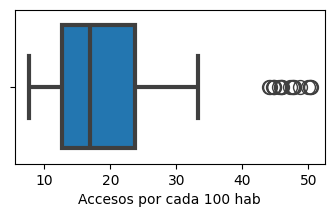

In [176]:
# Reviso si hay valores atipicos (outliers) en la columna 'Accesos por cada 100 hab'
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'Accesos por cada 100 hab', data = df_petpob20a24,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation
#plt.show()

Se observa que la tasa media de penetración cada 100 habitantes es de alrededor de 18, considerando todas las jurisdicciones del país.</br>
</br>
En un diagrama boxplot se consideran valores atípicos o outliers los ubicados por fuera de las líneas verticales de los extremos (llamadas bigotes). Los mismos se representan como puntos.</br> 
En este diagrama vemos que aparecen tasas de penetración mayores a 40 cada 100 habitantes como valores atípicos.  

In [165]:
# reviso a que provincia y trimestre pertenecen los valores mayores a 40. Estimo que corresponden a CABA
df_petpob20a24[df_petpob20a24['Accesos por cada 100 hab'] > 40]['Provincia'].unique()

array(['Capital Federal'], dtype=object)

No son outliers. Estimamos que CABA tenía la mayor cantidad de accesos por cada 100 hab comparado con el resto de las jurisdicciones del país. Y lo observamos en este resultado.

</br>

- Penetración Hogares - tasa por cada 100 hogares por provincia

In [5]:
df_pethog = pd.read_excel('datos/internet.xlsx', sheet_name='Penetracion-hogares')

In [6]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_pethog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


No hay valores nulos en ninguna de las filas ni columnas del dataframe Penetración hogares por provincias

In [7]:
# veo las primeras filas para conocer el dataset
df_pethog.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [8]:
# Como expliqué antes se analizaran los datos posteriores a 2019
# selecciono los datos de los años 2020 a 2024
df_pethog20a24 = df_pethog[df_pethog['Año'] > 2019]

In [9]:
# averiguo cantidad de filas
df_pethog20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           432 non-null    int64  
 1   Trimestre                     432 non-null    int64  
 2   Provincia                     432 non-null    object 
 3   Accesos por cada 100 hogares  432 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.9+ KB


Se observan 432 filas de valores no nulos. Si no hay filas duplicadas estan los datos completos para los trimestres de los años 2020 a 2024, como en el dataset anterior.

In [18]:
# Busqueda de duplicados
# Selecting duplicate rows based on list of column names
# duplicate = df[df.duplicated(['Name', 'Age'])]
df_pethog20a24[df_pethog20a24.duplicated(['Año', 'Trimestre', 'Provincia'])]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares


No se encontraron filas duplicadas para la combinación de columnas Año, Trimestre y Provincia en el dataframe Penetración Hogares

<Axes: xlabel='Accesos por cada 100 hogares'>

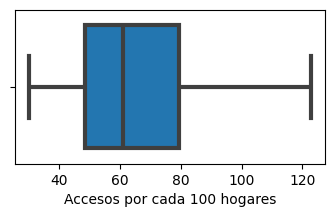

In [175]:
# Reviso si hay valores atipicos (outliers) en la columna 'Accesos por cada 100 hogares'
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'Accesos por cada 100 hogares', data = df_pethog20a24,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

No se observan valores atípicos. La media de accesos por cada 100 hogares es levemente superior a 60, considerandos todas las jurisdicciones.</br> 
El 25% de los valores está entre 80 y 120. </br>
Por lo que existirían hogares con más de un acceso a internet. </br>
(En comunicación telefónica con personal de Enacom se confirmó esta información. Refirieron que serían clientes comerciales que contrarían el servicio de acceso a internet como clientes familiares u hogares.)

</br>

- Penetración Accesos Totales por cada 100 habitantes y por cada 100 hogares

In [10]:
df_pettot = pd.read_excel('datos/internet.xlsx', sheet_name='Penetracion-totales')

In [11]:
df_pettot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


No hay valores nulos en ninguna de las filas ni columnas del dataframe df_pettot (Penetracion Totales)

In [22]:
# veo las primeras filas para conocer el dataset
df_pettot.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


In [12]:
# Como expliqué antes se analizaran los datos posteriores a 2019
# selecciono los datos de los años 2020 a 2024
df_pettot20a24 = df_pettot[df_pettot['Año'] > 2019]

In [24]:
# reviso cuantas filas hay,los tipos de datos y si hay valores nulos
df_pettot20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           18 non-null     int64  
 1   Trimestre                     18 non-null     int64  
 2   Accesos por cada 100 hogares  18 non-null     float64
 3   Accesos por cada 100 hab      18 non-null     float64
 4   Periodo                       18 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 864.0+ bytes


Hay datos de Accesos por cada 100 hogares y por cada 100 hab para 18 los trimestres que analizaremos. No hay valores nulos

In [25]:
# Busqueda de duplicados
# Selecting duplicate rows based on list of column names
# duplicate = df[df.duplicated(['Name', 'Age'])]
df_pettot20a24[df_pettot20a24.duplicated(['Año', 'Trimestre'])]

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo


No se encontraron filas duplicadas para la combinación de columnas Año y Trimestre en el dataframe df_pettot20a24 (Penetracion Totales)

In [13]:
# Armaré un solo dataframe uniendo las columnas de los dataframes de acceso a hoagres y acceso a poblacion y las filas de los totales 

# hago un inner join entre las tablas de Penetracion Poblacion y Penetracion hogares usando como clave la combinacion de las columnas Año, Trimestre y Provincia
# f1.merge(df2, left_on=['A_col1', 'A_col2'], right_on=['B_col1', 'B_col2'])
df_merge = pd.merge(df_pethog20a24, df_petpob20a24, how='inner', on=['Año', 'Trimestre','Provincia'])

In [14]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           432 non-null    int64  
 1   Trimestre                     432 non-null    int64  
 2   Provincia                     432 non-null    object 
 3   Accesos por cada 100 hogares  432 non-null    float64
 4   Accesos por cada 100 hab      432 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 17.0+ KB


In [15]:
# Agrego columna Provincia para unirla al dataframe con los valores de accesso por provincias
df_pettot20a24['Provincia'] = 'Argentina - Total país'

In [16]:
# agrego las filas de las provincias al dataframe de los total pais
df_merge2 = pd.concat([df_pettot20a24, df_merge])

In [17]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 431
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           450 non-null    int64  
 1   Trimestre                     450 non-null    int64  
 2   Accesos por cada 100 hogares  450 non-null    float64
 3   Accesos por cada 100 hab      450 non-null    float64
 4   Periodo                       18 non-null     object 
 5   Provincia                     450 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 24.6+ KB


In [18]:
# Selecciono las columnas que me interesan (no usare periodo), las reordeno y renombro el dataframe
# df = df[['mean', 4,3,2,1]]
df_penet20a24 = df_merge2[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'	, 'Accesos por cada 100 hab']]

In [32]:
df_penet20a24.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2024,2,Argentina - Total país,78.13,24.57
1,2024,1,Argentina - Total país,78.89,24.79
2,2023,4,Argentina - Total país,78.56,24.66
3,2023,3,Argentina - Total país,77.84,24.41
4,2023,2,Argentina - Total país,77.02,24.14


In [33]:
df_penet20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 431
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           450 non-null    int64  
 1   Trimestre                     450 non-null    int64  
 2   Provincia                     450 non-null    object 
 3   Accesos por cada 100 hogares  450 non-null    float64
 4   Accesos por cada 100 hab      450 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 21.1+ KB


In [19]:
# Modifico valor capital federal a CABA
# df.loc[df['column_name'] == 'some_value', 'column_name'] = 'new_value'
df_penet20a24.loc[df_penet20a24['Provincia'] == 'Capital Federal', 'Provincia'] = 'CABA'

In [35]:
# grabo el archivo para usarlo en el tablero
df_penet20a24.to_excel("datos/penet20a24.xlsx", index=False)  

</br>

- Análisis de los datos de penetración por cada 100 habitantes y por cada 100 hogares totales y por jurisdicción

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hogares'>

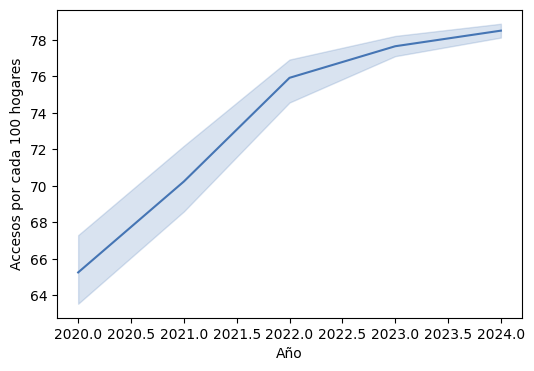

In [21]:
plt.figure(figsize=(6, 4))
selected_data = df_penet20a24[df_penet20a24['Provincia'] == 'Argentina - Total país']
sns.lineplot(y= "Accesos por cada 100 hogares", x='Año', data= selected_data, color='#4575b4' )

Se observa que la tasa de penetración por cada 100 hogares aumentó de 65 en 2020 a 78 en el segundo trimestre de 2024 (de 64,21 a 78,13 son los valores precisos).

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hab'>

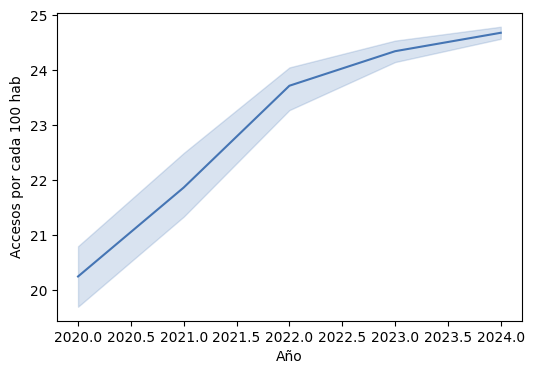

In [22]:
plt.figure(figsize=(6, 4))
selected_data = df_penet20a24[df_penet20a24['Provincia'] == 'Argentina - Total país']
sns.lineplot(y= "Accesos por cada 100 hab", x='Año', data= selected_data , color='#4575b4')

Se observa que la tasa de penetración por cada 100 habitantes aumentó de 21 en 2020 a 24,5 en el segundo trimestre de 2024.

<Axes: xlabel='Accesos por cada 100 hogares', ylabel='Provincia'>

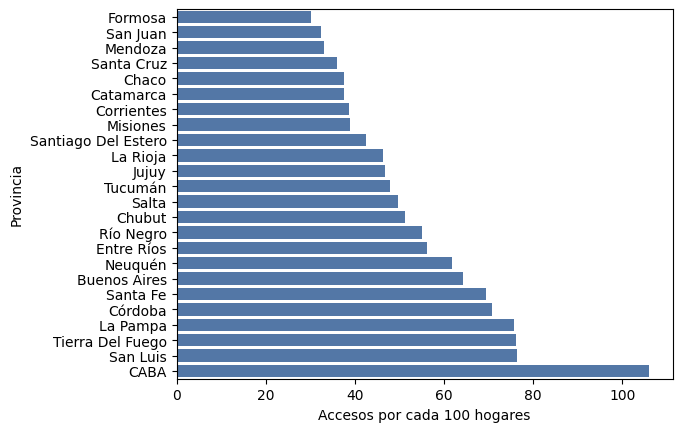

In [24]:
selected_data = df_penet20a24[(df_penet20a24['Año'] == 2020) & (df_penet20a24['Trimestre'] == 1) & (df_penet20a24['Provincia'] != 'Argentina - Total país')]
sns.barplot(x = 'Accesos por cada 100 hogares',
            y = 'Provincia',
            data = selected_data , order=selected_data.sort_values('Accesos por cada 100 hogares').Provincia,  color='#4575b4')

En el primer trimestre de 2020 se observa que las jurisdicciones con menor tasa de accesos por cada 100 hogares eran Formosa, San Juan, Mendoza y Santa Cruz con una tasa de penetracion menor a 40. </br>
Y que las jurisdicciones de Neuquén, Buenos Aires, Santa Fe, Córdoba, La Pampa, Tierra del Fuego, San Luis y CABA tenían tasas de penetración mayores a 60 cada 100 hogares 

<Axes: xlabel='Accesos por cada 100 hogares', ylabel='Provincia'>

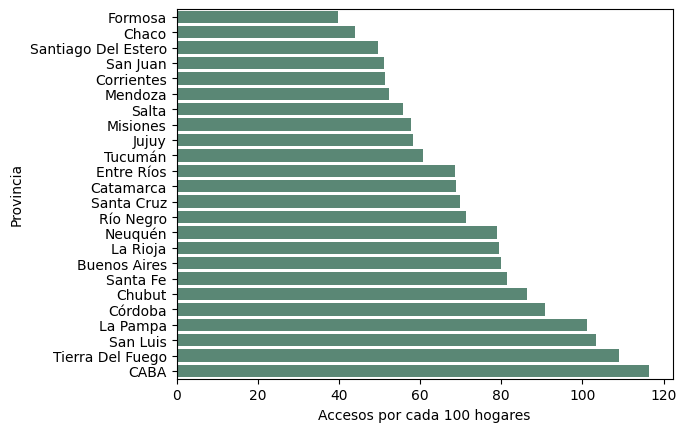

In [26]:
selected_data = df_penet20a24[(df_penet20a24['Año'] == 2024) & (df_penet20a24['Trimestre'] == 2) & (df_penet20a24['Provincia'] != 'Argentina - Total país')]
sns.barplot(x = 'Accesos por cada 100 hogares',
            y = 'Provincia',
            data = selected_data , order=selected_data.sort_values('Accesos por cada 100 hogares').Provincia, color='#528f76')

Para el segundo trimestre de 2024 se observa que todas las jurisdicciones aumentaron la tasa de penetración cada 100 hogares, superando los 40 accesos cada 100 hogares. </br>
Formosa continúa siendo la provincia con menor tasa de penetración. Mientras que La Pampa, Tierra del Fuego, San Luis y CABA continúan siendo las jurisdicciones con mayores tasas de penetración superando la tasa de 100 accesos cada 100 hogares. </br>
Llama la atención el crecimiento de la tasa de acceso de La Rioja en este periodo ya que en 2020 estaba entre las 12 jurisdicciones con menor tasa de penetración cada 100 hogares y en el último trimestre analizado se ubica entre las 9 jurisdicciones con mayor tasa de penetración cada 100 hogares. 

</br>
</br>

### Acceso a internet fija - Tecnología

- Accesos por Tecnología por jurisdicción

In [28]:
df_tecno = pd.read_excel('datos/internet.xlsx', sheet_name='Accesos Por Tecnología')

In [3]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_tecno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


Las columnas Año y Trimestre son de tipo Object. Se convertirán a tipo int. También se convertirán a int las columnas con cantidades de accesos por tipo de tecnología

In [4]:
df_tecno.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [29]:
# Por como aparecen los datos Parecería que puedo convertir las columnas Año y Trimestre a int
# Elimino antes las filas de los años que no usare. Tal vez alli esten los valores nulos. No se puede convertir a int los datos nulos

# selecciono los datos de los años 2020 a 2024

df_tecno20a24 = df_tecno[df_tecno['Año'].isin([2020, 2021, 2022, 2023, 2024])]

In [6]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_tecno20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 0 to 430
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           431 non-null    object 
 1   Trimestre     431 non-null    object 
 2   Provincia     431 non-null    object 
 3   ADSL          431 non-null    float64
 4   Cablemodem    431 non-null    float64
 5   Fibra óptica  431 non-null    float64
 6   Wireless      431 non-null    float64
 7   Otros         431 non-null    float64
 8   Total         431 non-null    float64
dtypes: float64(6), object(3)
memory usage: 33.7+ KB


No hay valores nulos. Tiene una fila menos que los dataframe de penetración. Para alguna jurisdicción deben faltar los datos de un trimestre.

In [30]:
# Convierto a int las columnas Año y Trimestre para mantener tipos de datos homogéneos
# Los datos de accesos tambien tiene que ser tipo int
# df = df.astype({'col1': 'object', 'col2': 'int'})
df_tecno20a24 = df_tecno20a24.astype({'Año': 'int64', 'Trimestre': 'int64', 'ADSL':	'int64', 'Cablemodem': 'int64',	'Fibra óptica': 'int64', 'Wireless': 'int64',
                                      	'Otros': 'int64', 'Total': 'int64'})

In [8]:
# Búsqueda de duplicados
# Podría haber duplicados. Por lo que faltaría más de un trimestre
df_tecno20a24[df_tecno20a24.duplicated(['Año', 'Trimestre', 'Provincia'])]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total


No hay combinacion de 'Año', 'Trimestre', 'Provincia' duplicados para esta solapa

In [31]:
# Cuento la cantidad de trimestres por jurisdicción para ver a cuál le falta
trimestre_counts = df_tecno20a24[["Provincia", "Trimestre"]].groupby("Provincia").count()
trimestre_counts[trimestre_counts['Trimestre'] < 18]

,Trimestre
Provincia,
Buenos Aires,17


Faltan los datos de un trimestre de la Provincia de Buenos Aires. Podría conseguirlos sumando todas las localidades de esa provincia de la solapa Accesos_tecnologia_localidad del archivo excel 'internet' o restando de los totales de ese trimestre de los datos que están en la solapa Totales Accesos Por Tecnología. Los calcularé de los totales porque tienen las mismas columnas de tipo de tecnología. En el de localidades hay otras opciones como satelital, dial up y wimax y podrían provocar errores en los cálculos.

In [10]:
# Veo que trimestre falta

# unique
# Top-level unique method for any 1-d array-like object.
# pd.Series([2, 1, 3, 3], name='A').unique()
# Armo una serie con los años y trimestres de PBA. Muy complicado.

# Cuento los trimestres por año
# df.groupby(['col5', 'col2']).size()

df_tecno20a24[df_tecno20a24['Provincia'] == 'Buenos Aires'][['Año', 'Trimestre']].groupby(['Año', 'Trimestre']).count()

Empty DataFrame
Columns: []
Index: [(2020, 1), (2020, 2), (2020, 3), (2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2023, 4), (2024, 2)]

Faltan los datos del primer trimestre del año 2024 de la Provincia de Buenos Aires. </br>
Encontré esos datos en https://indicadores.enacom.gob.ar/datos-abiertos-internet-atp. Agrego esa fila

In [32]:
# agrego los datos de internet accesso tecnologia para Provincia de Buenos Aires Trimestre 1 año 2024

new_row = pd.DataFrame([[2024, 1, 'Buenos Aires', 203297, 2790663, 1799013, 
                         150290, 101294, 5044557]], columns=['Año', 'Trimestre', 'Provincia', 'ADSL',  'Cablemodem', 'Fibra óptica',	'Wireless', 'Otros', 'Total'])

df_tecno20a24 = pd.concat([df_tecno20a24, new_row], ignore_index=True)


<Axes: xlabel='Total'>

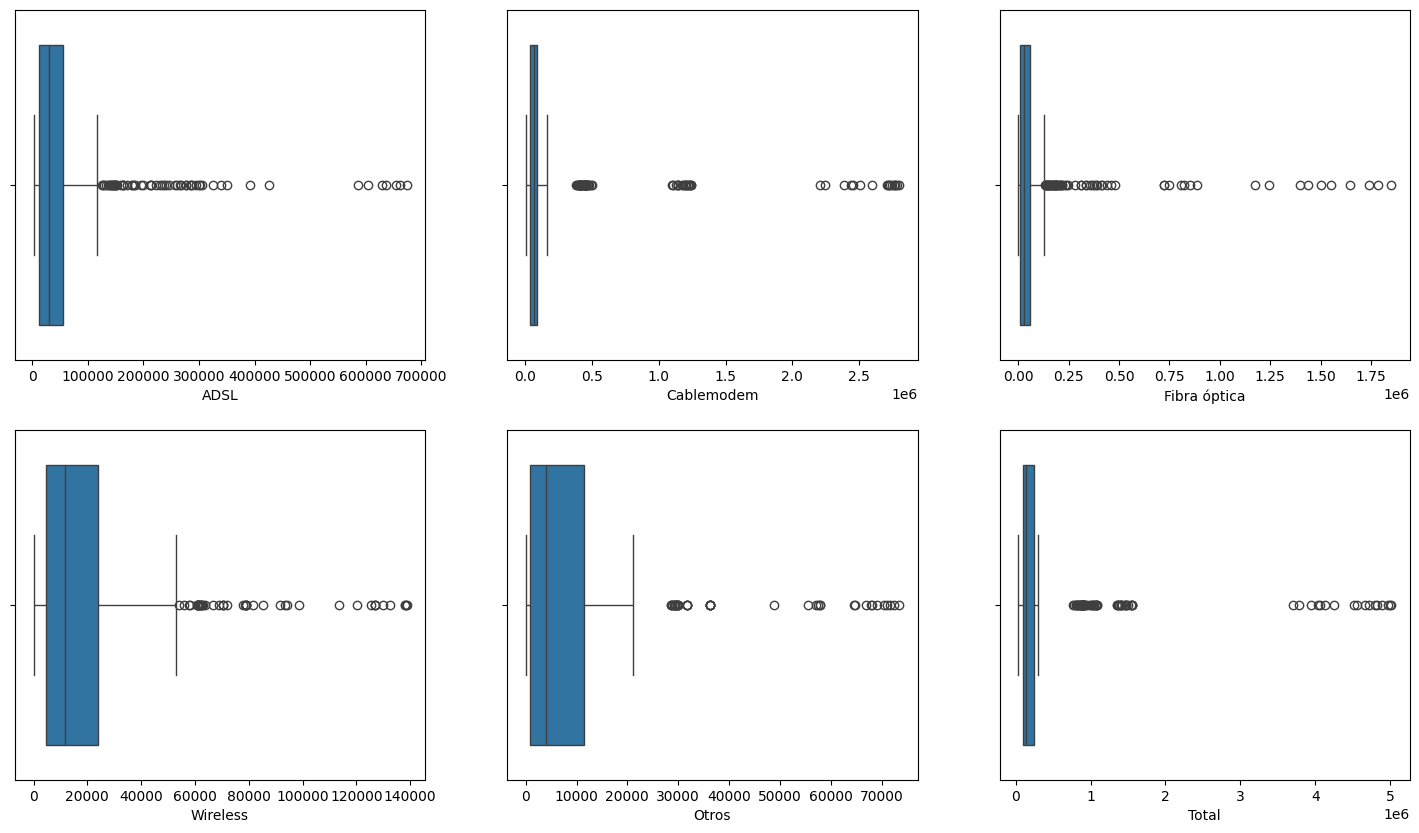

In [190]:
# Reviso si hay valores atipicos (outliers) en las columnas de accesso tecnologia
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], data=df_tecno20a24, x='ADSL')
sns.boxplot(ax=axes[0, 1], data=df_tecno20a24, x='Cablemodem')
sns.boxplot(ax=axes[0, 2], data=df_tecno20a24, x='Fibra óptica')
sns.boxplot(ax=axes[1, 0], data=df_tecno20a24, x='Wireless')
sns.boxplot(ax=axes[1, 1], data=df_tecno20a24, x='Otros')
sns.boxplot(ax=axes[1, 2], data=df_tecno20a24, x='Total')

En estos gráficos encontramos muchos valores que serían outliers. </br>
Como se obsevó en el apartado anterior que hay varias jurisdicciones que tiene tasa de penetración mayor que el resto. </br> 
Se revisarán los valores para esas jurisdicciones: Neuquén, Buenos Aires, Santa Fe, Cordoba, La Pampa , Tierra del Fuego, San Luis y CABA

<Axes: xlabel='Total'>

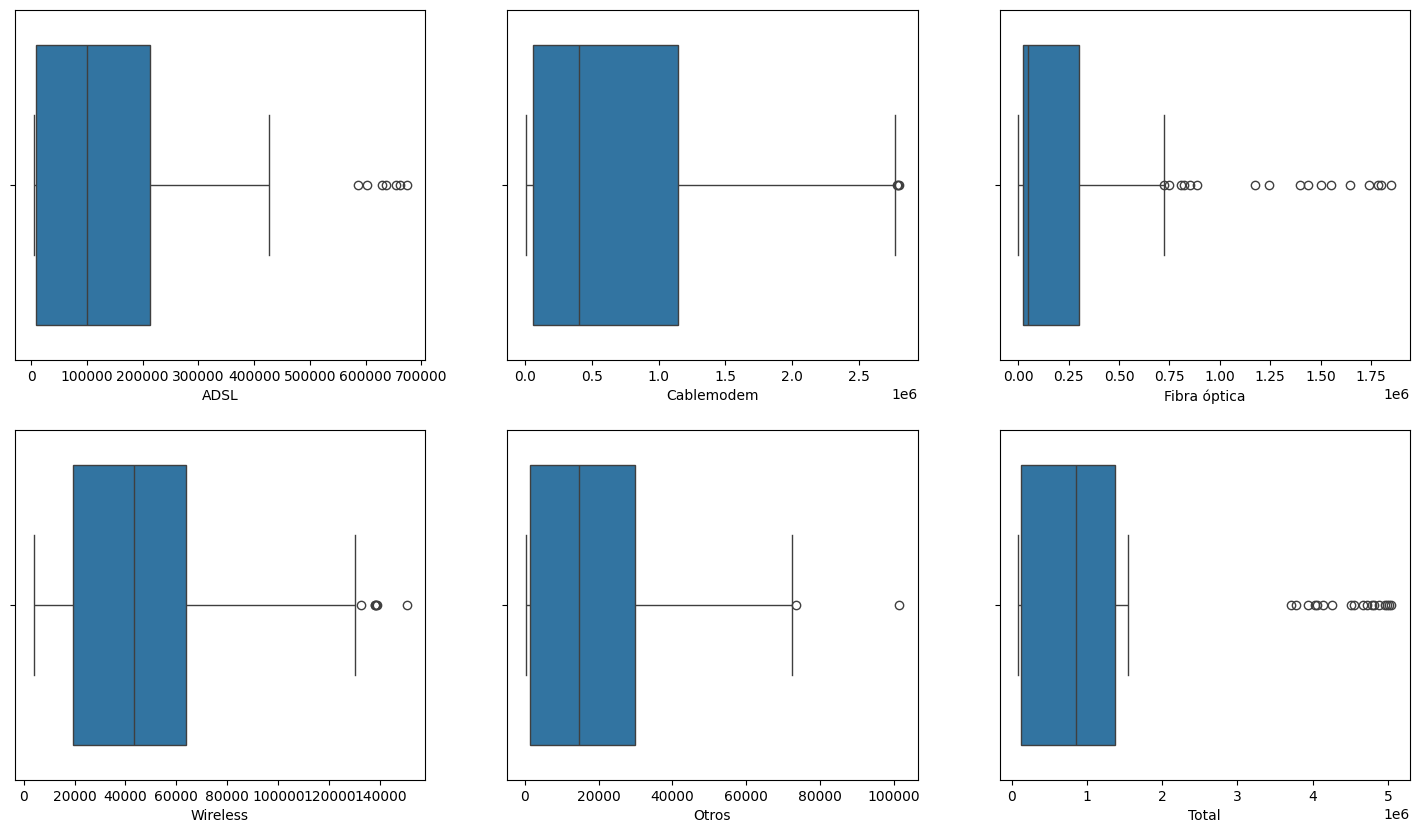

In [51]:
# Reviso si hay valores atipicos (outliers) en las columnas de accesso tecnologia
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

selected_data = df_tecno20a24[df_tecno20a24['Provincia'].isin(['Neuquén', 'La Pampa' , 'Tierra del Fuego', 'San Luis' , 'Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe'])]

sns.boxplot(ax=axes[0, 0], data=selected_data, x='ADSL')
sns.boxplot(ax=axes[0, 1], data=selected_data, x='Cablemodem')
sns.boxplot(ax=axes[0, 2], data=selected_data, x='Fibra óptica')
sns.boxplot(ax=axes[1, 0], data=selected_data, x='Wireless')
sns.boxplot(ax=axes[1, 1], data=selected_data, x='Otros')
sns.boxplot(ax=axes[1, 2], data=selected_data, x='Total')

Siguen apareciendo valores que podrían ser outliers. </br>
Analizaré las jurisdicciones con tasa de penetración mayores a 100 accesos cada 100 hogares para las tecnologías de ADSL, Fibra óptica,  Wireless</br>  y la columna de Total.

<Axes: xlabel='Total'>

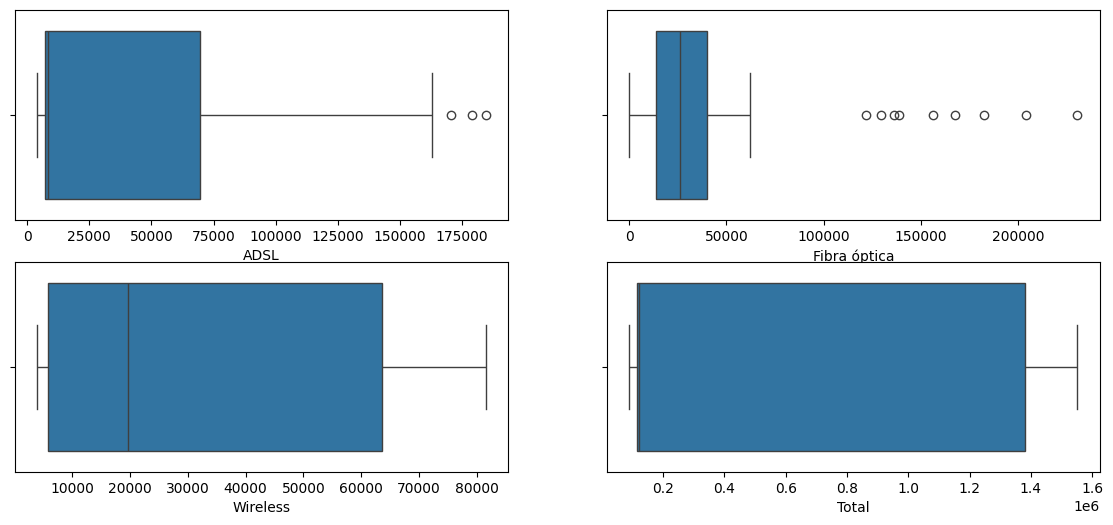

In [191]:
# Reviso si hay valores atipicos (outliers) en las columnas de accesso tecnologia
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

selected_data = df_tecno20a24[df_tecno20a24['Provincia'].isin(['La Pampa' , 'Tierra del Fuego', 'San Luis' , 'Capital Federal'])]


sns.boxplot(ax=axes[0, 0], data=selected_data, x='ADSL')
sns.boxplot(ax=axes[0, 1], data=selected_data, x='Fibra óptica')
sns.boxplot(ax=axes[1, 0], data=selected_data, x='Wireless')
sns.boxplot(ax=axes[1, 1], data=selected_data, x='Total')

En los accesos por tecnología ADSL y Fibra óptica aparecen valores mayores al bigote superior del boxplot. Averiguaré a qué jurisdicciones pertenecen. 

In [53]:
# reviso a que provincia y trimestre pertenecen los valores mayores a 600000 en ADSL 
df_tecno20a24[(df_tecno20a24['ADSL'] > 600000)]


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
287,2021,2,Buenos Aires,603255,2503830,854173,113546,57547,4132351
311,2021,1,Buenos Aires,629679,2452056,821597,98806,57864,4060002
335,2020,4,Buenos Aires,635651,2441248,804991,93444,57927,4033261
359,2020,3,Buenos Aires,653930,2384557,749087,94162,55541,3937277
383,2020,2,Buenos Aires,661272,2244277,723072,91736,57189,3777546
407,2020,1,Buenos Aires,673237,2210349,720688,85443,18334,3708051


In [54]:
# reviso a que provincia y trimestre pertenecen los valores mayores a 150000 en Fibra optica
df_tecno20a24[(df_tecno20a24['Fibra óptica'] > 1500000)]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055,2722466,1849476,138638,64745,4989380
47,2023,4,Buenos Aires,223391,2797700,1784593,137993,67943,5011620
71,2023,3,Buenos Aires,237705,2784175,1740239,137921,68197,4968237
95,2023,2,Buenos Aires,265537,2766463,1645945,138405,69138,4885488
119,2023,1,Buenos Aires,304583,2761043,1551074,132458,71770,4820928
431,2024,1,Buenos Aires,203297,2790663,1799013,150290,101294,5044557


Todos esos valores pertenecen a la Provincia de Buenos Aires. Aunque esa provincia no tiene tasa de penetración cada 100 hogares de las mas altas, es la provincia con mayor cantidad de habitantes del país y por ese motivo podrían aparecer esos valores atípicos.

</br>

- Totales de Accesos por Tecnología 

In [33]:
df_tecnotot = pd.read_excel('datos/internet.xlsx', sheet_name='Totales Accesos Por Tecnología')

In [15]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_tecnotot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


In [57]:
df_tecnotot.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [34]:
# selecciono los datos de los años 2020 a 2024
df_tecnotot20a24 = df_tecnotot[df_tecnotot['Año'].isin([2020, 2021, 2022, 2023, 2024])]

In [17]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_tecnotot20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           18 non-null     int64 
 1   Trimestre     18 non-null     int64 
 2   ADSL          18 non-null     int64 
 3   Cablemodem    18 non-null     int64 
 4   Fibra óptica  18 non-null     int64 
 5   Wireless      18 non-null     int64 
 6   Otros         18 non-null     int64 
 7   Total         18 non-null     int64 
 8   Periodo       18 non-null     object
dtypes: int64(8), object(1)
memory usage: 1.4+ KB


No hay valores nulos. Si no hay valores duplicados, como el total de filas es 18, estarían los totales para todos los años y trimestres que analizaré

In [60]:
# Búsqueda de duplicados
df_tecnotot20a24[df_tecnotot20a24.duplicated(['Año', 'Trimestre'])]

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo


No hay filas duplicadas por combinacion de 'Año', 'Trimestre'

<Axes: xlabel='Total'>

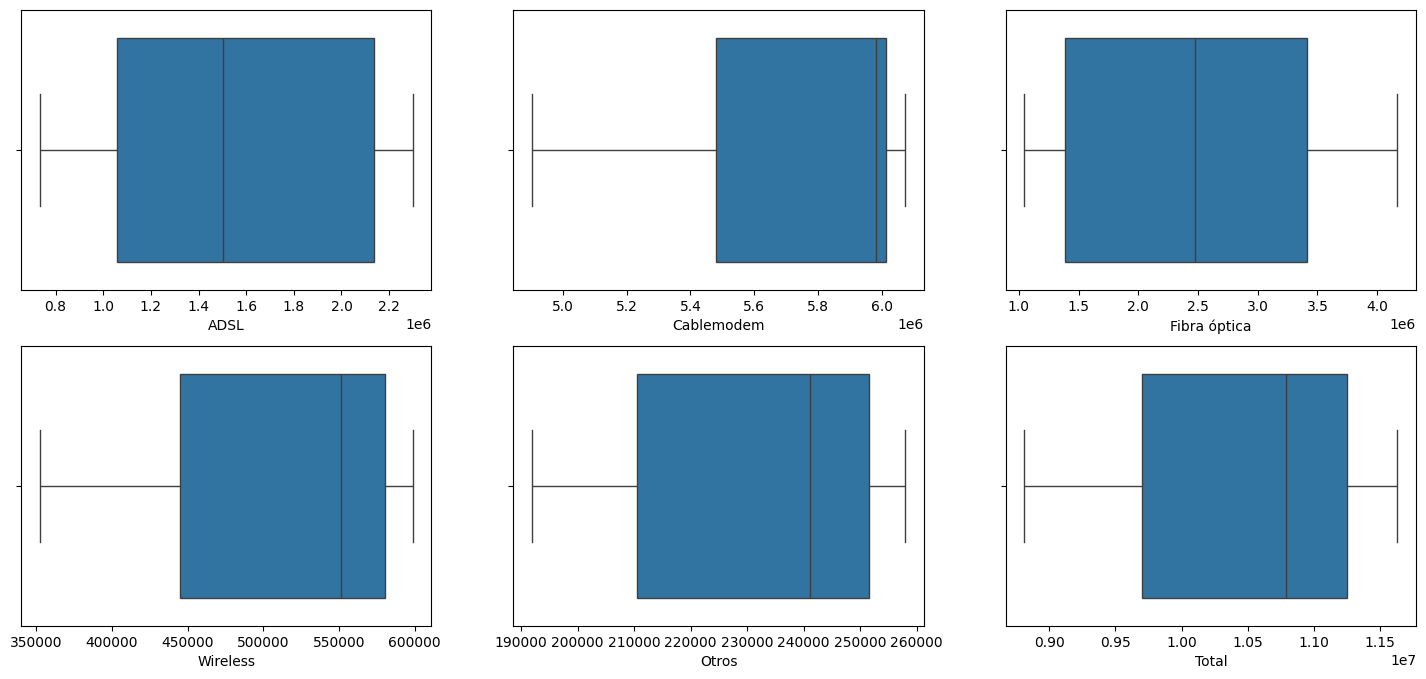

In [362]:
# Reviso si hay valores atipicos (outliers) en las columnas de accesso tecnologia
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

sns.boxplot(ax=axes[0, 0], data=df_tecnotot20a24, x='ADSL')
sns.boxplot(ax=axes[0, 1], data=df_tecnotot20a24, x='Cablemodem')
sns.boxplot(ax=axes[0, 2], data=df_tecnotot20a24, x='Fibra óptica')
sns.boxplot(ax=axes[1, 0], data=df_tecnotot20a24, x='Wireless')
sns.boxplot(ax=axes[1, 1], data=df_tecnotot20a24, x='Otros')
sns.boxplot(ax=axes[1, 2], data=df_tecnotot20a24, x='Total')

No se observan valores atípicos para los totales de accesos por tecnologías

In [18]:
# Reviso si la suma por fila del dataframe de acceso tecnologia por provincia es igual a la suma del dataframe de los totales

print('Suma filas df_tecnotot20a24: \n', df_tecnotot20a24[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].sum(axis = 0) )
print('\n')
print('Suma filas df_tecno20a24: \n',df_tecno20a24[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].sum(axis = 0) )

Suma filas df_tecnotot20a24: 
 ADSL             28040272
Cablemodem      103434597
Fibra óptica     44494419
Wireless          9240532
Otros             4167373
Total           189377193
dtype: int64


Suma filas df_tecno20a24: 
 ADSL             28040272
Cablemodem      103434597
Fibra óptica     44494419
Wireless          9240532
Otros             4167373
Total           189377193
dtype: int64


La suma por filas de ambos dataframes dan los mismos resultados, como esperaba

In [35]:
# Agrego la columna Provincia al dataframe de los totales
df_tecnotot20a24['Provincia'] = 'Argentina - Total país'

In [36]:
# agrego las filas de las provincias al dataframe de los total pais
df_merge = pd.concat([df_tecnotot20a24, df_tecno20a24])

In [37]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 431
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           450 non-null    int64 
 1   Trimestre     450 non-null    int64 
 2   ADSL          450 non-null    int64 
 3   Cablemodem    450 non-null    int64 
 4   Fibra óptica  450 non-null    int64 
 5   Wireless      450 non-null    int64 
 6   Otros         450 non-null    int64 
 7   Total         450 non-null    int64 
 8   Periodo       18 non-null     object
 9   Provincia     450 non-null    object
dtypes: int64(8), object(2)
memory usage: 38.7+ KB


In [38]:
# reordeno las columnas y renombro el dataframe
# df = df[['mean', 4,3,2,1]]

df_tecnoacc20a24 = df_merge[['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']]

In [69]:
df_tecnoacc20a24.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Argentina - Total país,733491,5867504,4169958,593197,191957,11556107
1,2024,1,Argentina - Total país,774475,5986957,4015101,598682,257941,11633156
2,2023,4,Argentina - Total país,836390,6022532,3908183,585760,194796,11547661
3,2023,3,Argentina - Total país,897895,6018832,3708718,581436,200027,11406908
4,2023,2,Argentina - Total país,1006509,5997149,3463988,581823,202428,11251897


In [39]:
# Modifico valor capital federal a CABA
# df.loc[df['column_name'] == 'some_value', 'column_name'] = 'new_value'
df_tecnoacc20a24.loc[df_tecnoacc20a24['Provincia'] == 'Capital Federal', 'Provincia'] = 'CABA'

In [24]:
# grabo el archivo para usarlo en el tablero
df_tecnoacc20a24.to_excel("datos/tecnoacc20a24.xlsx", index=False)  

</br>

- Análisis de los datos de accesos por tecnología totales y por jurisdicción

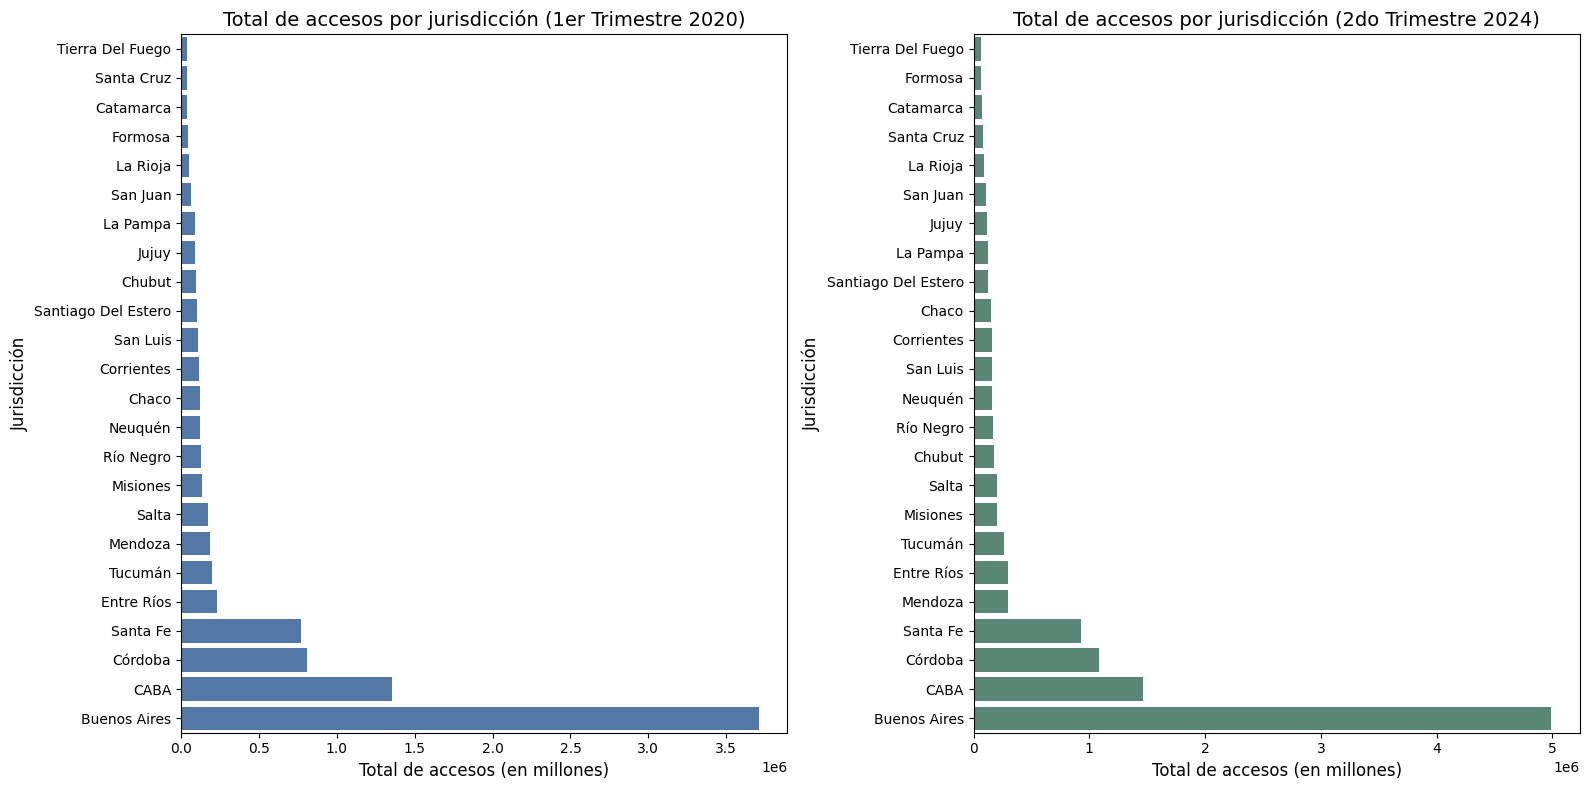

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

selected_data = df_tecnoacc20a24[(df_tecnoacc20a24['Año'] == 2020) & (df_tecnoacc20a24['Trimestre'] == 1) & (df_tecnoacc20a24['Provincia'] != 'Argentina - Total país')]
selected_data1 = df_tecnoacc20a24[(df_tecnoacc20a24['Año'] == 2024) & (df_tecnoacc20a24['Trimestre'] == 2) & (df_tecnoacc20a24['Provincia'] != 'Argentina - Total país')]

sns.barplot(ax=axes[0], x = 'Total',
            y = 'Provincia',
            data = selected_data , order=selected_data.sort_values('Total')['Provincia'], color = "#4575b4")

sns.barplot(ax=axes[1], x = 'Total',
            y = 'Provincia',
            data = selected_data1 , order=selected_data1.sort_values('Total')['Provincia'], color = '#528f76')

# Add titles to the subplots
axes[0].set_title('Total de accesos por jurisdicción (1er Trimestre 2020)', fontsize=14)
axes[1].set_title('Total de accesos por jurisdicción (2do Trimestre 2024)', fontsize=14)

# Customize axes
axes[0].set_xlabel('Total de accesos (en millones)', fontsize=12)
axes[1].set_xlabel('Total de accesos (en millones)', fontsize=12)
axes[0].set_ylabel('Jurisdicción', fontsize=12)
axes[1].set_ylabel('Jurisdicción', fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Si analizamos la cantidad de accesos independientemente de la tecnología observamos que aumentó el total de accesos de 8.812.426 a comienzo de 2020 hasta 11.556.107 en el segundo trimestre de 2024. </br>
Todas las jurisdicciones aumentaron la cantidad de accesos. </br>
Podemos observar dos grupos de jurisdicciones que se mantienen estables durante periodo analizado. Un grupo de provincias con cantidad de accesos menores a 500.000. Y otro grupo con un total de accesos por jurisdicción mayores a 500.000 conformado por Santa Fe, Córdoba, CABA y Provincia de Buenos Aires, que son también las cuatro jurisdicciones con más habitantes y con mayor actividad económica del país.

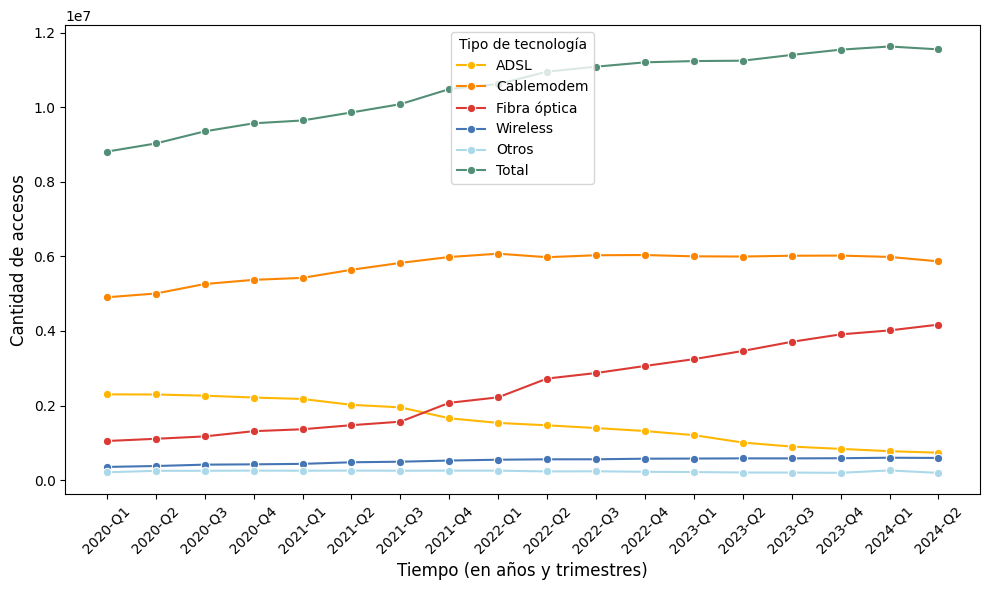

In [47]:
# Paleta de colores personalizada
# 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total'
custom_palette = {
    'ADSL': "#ffb703", # amarillo
    'Cablemodem': "#fb8500", # naranja
    'Fibra óptica': "#db3a34", # mas rojo
    'Wireless': "#4575b4", # azul extremo
    'Otros':  "#abd9e9", # azul intermedio
    'Total': '#528f76', # verde dolar
  }

selected_data = df_tecnoacc20a24[df_tecnoacc20a24['Provincia'] == 'Argentina - Total país']
selected_data = selected_data.loc[:, df_tecnoacc20a24.columns != 'Provincia']

# Combina 'Año' y 'Trimestre' en una sola columna
selected_data['Time'] = selected_data['Año'].astype(str) + '-Q' + selected_data['Trimestre'].astype(str)

# ordena la columna Time de Q1 2020 a Q2 2024
selected_data['Time'] = pd.Categorical(
    selected_data['Time'],
    categories=sorted(selected_data['Time'].unique(), key=lambda x: (int(x.split('-')[0]), int(x.split('Q')[1]))),
    ordered=True
)

# Prepara el dataframe en formato largo para usar en seaborn
df_melted = selected_data.melt(
    id_vars=['Time'],
    value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total'],
    var_name='Connection_Type',
    value_name='Connections'
)

# Grafico con la librería seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Time', y='Connections', hue='Connection_Type', marker='o', palette = custom_palette )

# Personalizo el gráfico
plt.xlabel('Tiempo (en años y trimestres)', fontsize=12)
plt.ylabel('Cantidad de accesos', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de tecnología')
plt.tight_layout()

plt.show()

Se observa que la cantidad de accesos por tecnología wireless aumentó de 352.333 en el primer trimestre de 2020 hasta 593.197
en el segundo trimestre de 2024. </br>
Los accesos por tecnología ADSL tuvieron un descenso del 68% desde 2.299.457 accesos hasta 733.491 accesos durante el período analizado. </br>
Los accesos por cablemodem tuvieron un aumento del 20% y continúan siendo la tecnología más elegida.</br>
Por último, los accesos por fibra óptica han aumentado casi 400% entre comienzo de 2020 y el segundo trimestre de 2024.

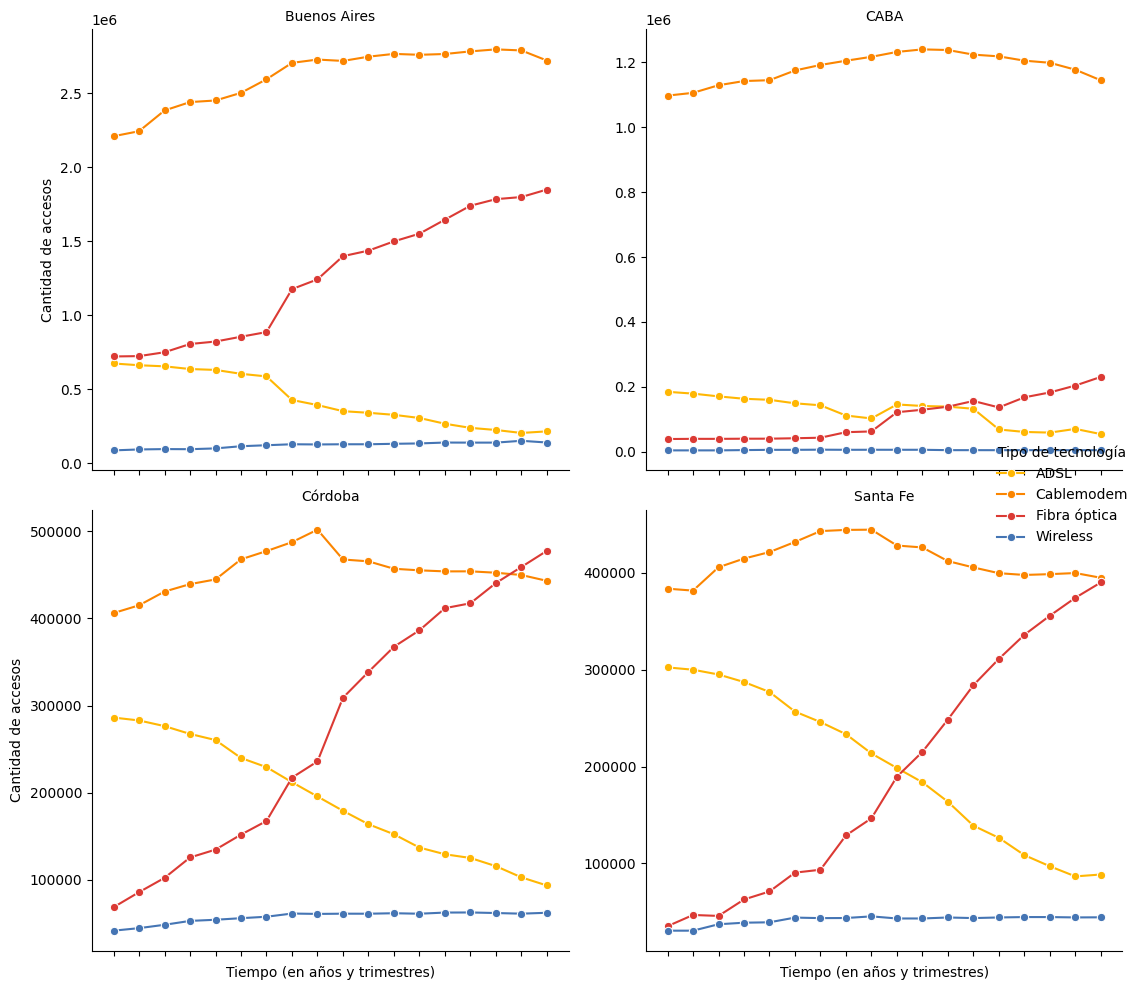

In [48]:
# Paleta personalizada
custom_palette = {
    'ADSL': "#ffb703", # amarillo
    'Cablemodem': "#fb8500", # naranja
    'Fibra óptica': "#db3a34", # mas rojo
    'Wireless': "#4575b4", # azul extremo
    'Otros':  "#abd9e9", # azul intermedio
    'Total': '#528f76', # verde dolar
  }

# Filtro las provincias seleccionadas
selected_data = df_tecnoacc20a24[df_tecnoacc20a24['Provincia'].isin(['Santa Fe', 'Córdoba', 'CABA', 'Buenos Aires'])]

# Combina 'Año' y 'Trimestre' en una unica columna 
selected_data['Time'] = selected_data['Año'].astype(str) + '-Q' + selected_data['Trimestre'].astype(str)

# Ordena la columna Time en forma ascendente
selected_data['Time'] = pd.Categorical(
    selected_data['Time'],
    categories=sorted(selected_data['Time'].unique(), key=lambda x: (int(x.split('-')[0]), int(x.split('Q')[1]))),
    ordered=True
)

# Prepara el dataframe en formato largo para usar en seaborn
df_melted = selected_data.melt(
    id_vars=['Time', 'Provincia'],  # Include 'Provincia' for FacetGrid
    value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless'],  # Columns to melt
    var_name='Connection_Type',  # Column name for connection types
    value_name='Connections'  # Column name for connection values
)

# Crea un FacetGrid con un gráfico por provincia
g = sns.FacetGrid(
    data=df_melted,
    col='Provincia',  
    col_wrap=2,  
    height=5,  
    sharey=False  # permite que cada subgrafico tenga su propia escala en el eje y
)

# Mapea el grafico de lineas sobre cada subgrafico
g.map(
    sns.lineplot,
    'Time',  # eje X
    'Connections',  # eje Y: Cantidad de accesos
    'Connection_Type',  # Hue: Lineas de colores por tipo de tecnologia
    marker='o'  # marcador de cada punto (probe con otros para variar pero no me gustaron)
    , palette = custom_palette
)

# Personaliza el FacetGrid
g.add_legend(title='Tipo de tecnología')  
g.set_titles('{col_name}')  # nombre de la provincia en cada subgrafico
g.set_axis_labels('Tiempo (en años y trimestres)', 'Cantidad de accesos')  
g.set_xticklabels(rotation=45)  # rota las etiquetas de eje x para que se lean mejor


plt.tight_layout()

# Show the plot
plt.show()

Al observar la evolución de los tipos de tecnologías para las cuatro jurisdicciones con mayor cantidad de accesos vemos que los accesos con tecnología wireless y cablemodem aumentaron, pero muy lentamente. </br>
Córdoba y Santa Fe tienen un comportamiento similar. Los accesos ADSL descienden abruptamente, mientras los accesos de fibra óptica aumentan y ya superaron o superarán en breve a la cantidad de accesos por cablemodem. </br>
En CABA el aumento de la cantidad de accesos por fibra óptica tiene un crecimiento muy mesurado. Los accesos por cablemodem, aunque están descendiendo en proporción respecto de las otras tecnologías, tienen aún el 78% de mercado de esta jurisdicción </br>
En el caso de la Provincia de Buenos Aires, los accesos por cablemodem poseían el 54% del mercado en el segundo trimestre de 2024. Y los accesos por fibra óptica crecen anualmente y en el último periodo estudiado el 37% de los accesos a internet fija eran con esta tecnología.

</br>

### Accesos a internet fija - Velocidad

- Accesos por rangos de velocidad por provincia

In [100]:
df_velrango = pd.read_excel('datos/internet.xlsx', sheet_name='Accesos por rangos')

In [101]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_velrango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


Las columnas Año y Trimestre son de tipo Object. Veré cómo son los datos y convertiré a tipo int como para el resto de los dataframes

In [102]:
df_velrango.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


In [103]:
# selecciono los datos de los años 2020 a 2024

df_velrango20a24 = df_velrango[df_velrango['Año'].isin([2020, 2021, 2022, 2023, 2024])]

In [104]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_velrango20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 431
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  432 non-null    int64  
 1   Trimestre            432 non-null    int64  
 2   Provincia            432 non-null    object 
 3   HASTA 512 kbps       432 non-null    float64
 4   + 512 Kbps - 1 Mbps  432 non-null    float64
 5   + 1 Mbps - 6 Mbps    432 non-null    float64
 6   + 6 Mbps - 10 Mbps   432 non-null    float64
 7   + 10 Mbps - 20 Mbps  432 non-null    float64
 8   + 20 Mbps - 30 Mbps  432 non-null    float64
 9   + 30 Mbps            432 non-null    float64
 10  OTROS                432 non-null    float64
 11  Total                432 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 43.9+ KB


No hay valores nulos. Las columnas de los rangos de velocidad de acceso son de tipo float. Las convertiré a tipo int ya que una cantidad de accesos es un número entero positivo. </br> Hay 432 filas. Pero en una revisión se encontró que faltaba un trimestre para 2023 y había datos del 4to trimestre de 2024 (que al momento de escribir esto aún no se publicaron). </br>
Podrían faltar datos o haber un error en la denominación del año.

In [105]:
#df_tecno20a24[df_tecno20a24['Provincia'] == 'Buenos Aires'][['Año', 'Trimestre']].groupby(['Año', 'Trimestre']).count()
df_velrango20a24[['Año', 'Trimestre']].groupby(['Año', 'Trimestre']).count()

Empty DataFrame
Columns: []
Index: [(2020, 1), (2020, 2), (2020, 3), (2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2024, 1), (2024, 2), (2024, 4)]

In [106]:
# Reviso los valores del 4to trimestre de 2024 y los comparo con lo publicado en el sitio de Enacom. Podrian corresponder al 4to trimestre de 2023
df_velrango20a24[(df_velrango20a24['Año'] == 2024) & (df_velrango20a24['Trimestre'] == 4)]


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
48,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
49,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
50,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
51,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
52,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0
53,2024,4,Córdoba,99.0,8404.0,117068.0,91169.0,51126.0,26948.0,767427.0,17061.0,1079302.0
54,2024,4,Corrientes,67.0,2889.0,19949.0,17984.0,8108.0,5087.0,98904.0,6484.0,159472.0
55,2024,4,Entre Ríos,107.0,4408.0,37150.0,54377.0,16673.0,7236.0,164304.0,14382.0,298637.0
56,2024,4,Formosa,85.0,179.0,21856.0,11563.0,4545.0,272.0,23152.0,350.0,62002.0
57,2024,4,Jujuy,58.0,1343.0,15359.0,11724.0,28741.0,272.0,58543.0,1980.0,118020.0


Vimos más adelante que la suma de los valores por jurisdicción era igual a los valores totales para esta clasificación. Además, confirmamos con la publicación de Enacom del 4to trimestre de 2023 que los valores corresponden a ese trimestre. Corrijo el Año de estas filas a 2023

In [108]:
# df_velrango20a24[(df_velrango20a24['Año'] == 2024) & (df_velrango20a24['Trimestre'] == 4)]['Año'] = 2023
df_velrango20a24.loc[(df_velrango20a24['Año'] == 2024) & (df_velrango20a24['Trimestre'] == 4),'Año'] = 2023

In [110]:
# confirmo que se hizo el cambio
df_velrango20a24[(df_velrango20a24['Año'] == 2023) & (df_velrango20a24['Trimestre'] == 4)].count()

Año                    24
Trimestre              24
Provincia              24
HASTA 512 kbps         24
+ 512 Kbps - 1 Mbps    24
+ 1 Mbps - 6 Mbps      24
+ 6 Mbps - 10 Mbps     24
+ 10 Mbps - 20 Mbps    24
+ 20 Mbps - 30 Mbps    24
+ 30 Mbps              24
OTROS                  24
Total                  24
dtype: int64

In [111]:
# Los datos de accesos tambien tiene que ser tipo int
# df = df.astype({'col1': 'object', 'col2': 'int'})
df_velrango20a24 = df_velrango20a24.astype({'HASTA 512 kbps': 'int64',  '+ 512 Kbps - 1 Mbps': 'int64',  '+ 1 Mbps - 6 Mbps': 'int64',  '+ 6 Mbps - 10 Mbps': 'int64',
                                              '+ 10 Mbps - 20 Mbps': 'int64',  '+ 20 Mbps - 30 Mbps': 'int64',  '+ 30 Mbps': 'int64',  'OTROS': 'int64',  'Total': 'int64'})

In [112]:
# Búsqueda de duplicados
# Podría haber duplicados. Por lo que faltaría más de un trimestre
df_velrango20a24[df_velrango20a24.duplicated(['Año', 'Trimestre', 'Provincia'])]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total


No hay combinacion de 'Año', 'Trimestre', 'Provincia' duplicados para esta solapa

<Axes: xlabel='+ 30 Mbps'>

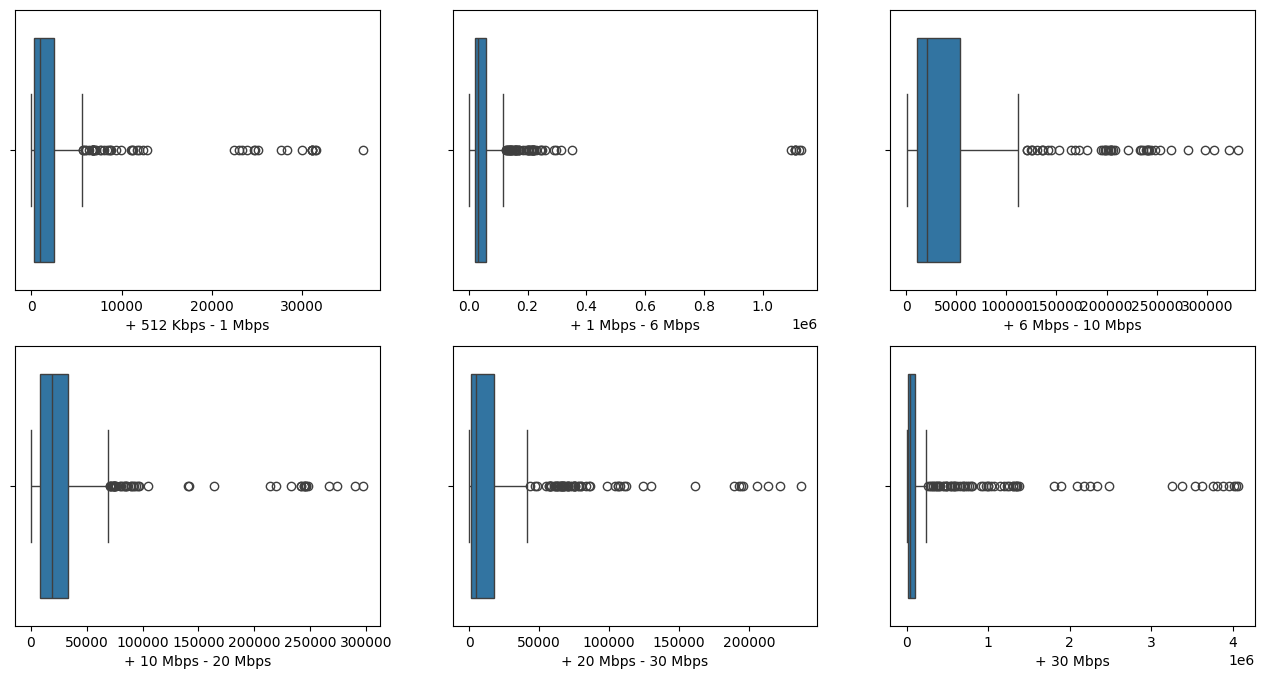

In [113]:
# Reviso si hay valores atipicos (outliers) en las columnas de accesso tecnologia
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

#sns.boxplot(ax=axes[0, 0], data=df_velrango20a24, x='HASTA 512 kbps')
sns.boxplot(ax=axes[0, 0], data=df_velrango20a24, x='+ 512 Kbps - 1 Mbps')
sns.boxplot(ax=axes[0, 1], data=df_velrango20a24, x='+ 1 Mbps - 6 Mbps')
sns.boxplot(ax=axes[0, 2], data=df_velrango20a24, x='+ 6 Mbps - 10 Mbps')
sns.boxplot(ax=axes[1, 0], data=df_velrango20a24, x='+ 10 Mbps - 20 Mbps')
sns.boxplot(ax=axes[1, 1], data=df_velrango20a24, x='+ 20 Mbps - 30 Mbps')
sns.boxplot(ax=axes[1, 2], data=df_velrango20a24, x='+ 30 Mbps')

En estos gráficos encontramos muchos valores que serían outliers. Reviso si corresponden a las jurisdicciones de CABA y Provincia de Buenos Aires que son las que tienen mayor cantidad de accesos a internet fija.

<Axes: xlabel='+ 30 Mbps'>

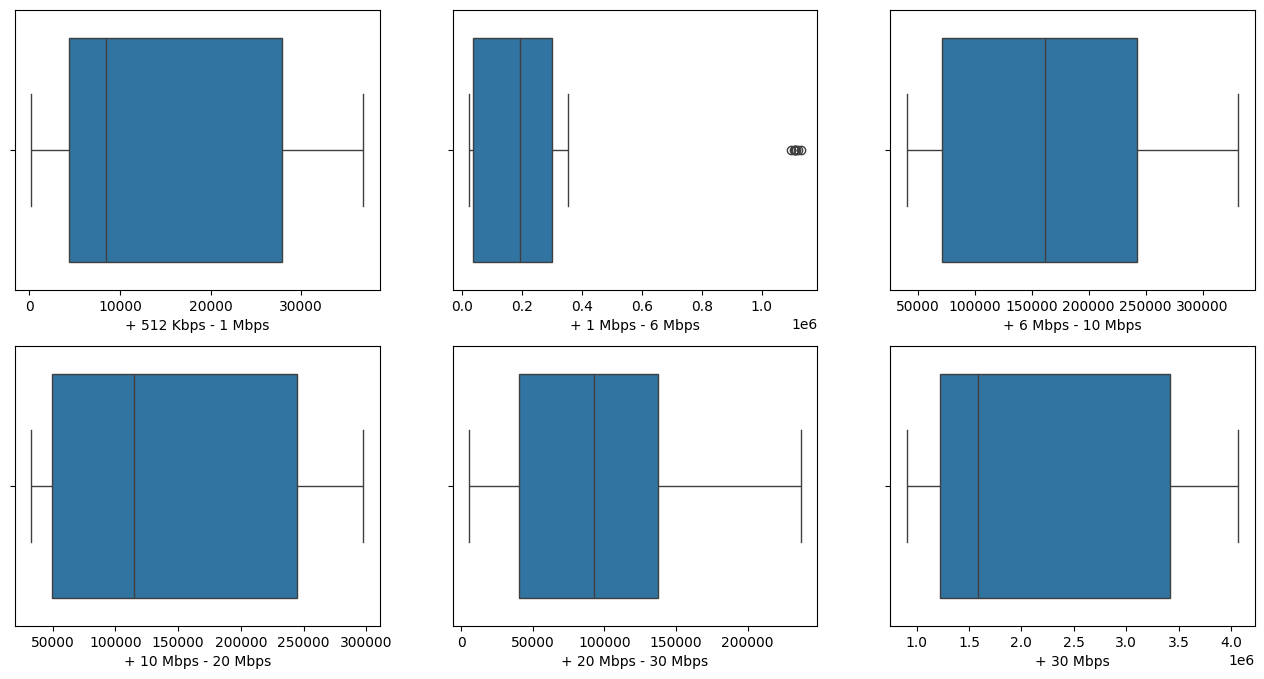

In [114]:
# Reviso si hay valores atipicos (outliers) en las columnas de accesso tecnologia
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

data_selected = df_velrango20a24[df_velrango20a24['Provincia'].isin(['Buenos Aires', 'Capital Federal'])]

sns.boxplot(ax=axes[0, 0], data=data_selected, x='+ 512 Kbps - 1 Mbps')
sns.boxplot(ax=axes[0, 1], data=data_selected, x='+ 1 Mbps - 6 Mbps')
sns.boxplot(ax=axes[0, 2], data=data_selected, x='+ 6 Mbps - 10 Mbps')
sns.boxplot(ax=axes[1, 0], data=data_selected, x='+ 10 Mbps - 20 Mbps')
sns.boxplot(ax=axes[1, 1], data=data_selected, x='+ 20 Mbps - 30 Mbps')
sns.boxplot(ax=axes[1, 2], data=data_selected, x='+ 30 Mbps')

Los valores que en los boxplots con datos de todo el país aparecían como valores atípicos correspondían a las jurisdicciones con más cantidad de accesos.</br>
Sin embargo aún observamos valores que podrían ser outliers en el gráfico de accesos con velocidad entre 1 y 6 Mbps. 

In [61]:
# reviso a que provincia y trimestre pertenecen los valores mayores a 1000000 accesos con velocidad entre 1 y 6 Mbps
df_velrango20a24[(df_velrango20a24['+ 1 Mbps - 6 Mbps'] > 1000000)][['Año', 'Trimestre', 'Provincia', '+ 1 Mbps - 6 Mbps']]


,Año,Trimestre,Provincia,+ 1 Mbps - 6 Mbps
264,2021,3,Buenos Aires,1108940
288,2021,2,Buenos Aires,1096049
312,2021,1,Buenos Aires,1108368
336,2020,4,Buenos Aires,1109865
360,2020,3,Buenos Aires,1113823
384,2020,2,Buenos Aires,1129236
408,2020,1,Buenos Aires,1122034


Estos valores corresponden a la Provincia de Buenos Aires, consideramos que no son outliers.

</br>

##### - Totales de accesos por rangos de velocidad

In [62]:
df_velrangotot = pd.read_excel('datos/internet.xlsx', sheet_name='Totales Accesos por rango')

In [49]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_velrangotot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      42 non-null     int64
 1   Trimestre                42 non-null     int64
 2   Hasta 512 kbps           42 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64
 8   Más de 30 Mbps           42 non-null     int64
 9   OTROS                    42 non-null     int64
 10  Total                    42 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


No hay valores nulos. Todas las columnas tienen tipo de datos int.</br> Los nombres de las columnas son distintos al dataframe que tiene los datos por provincia. Tendré que modificar los nombres para poder unir ambas.</br> 

In [50]:
df_velrangotot.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,2,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


In [63]:
# selecciono los datos de los años 2020 a 2024
df_velrangotot20a24 = df_velrangotot[df_velrangotot['Año'].isin([2020, 2021, 2022, 2023, 2024])]

In [64]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_velrangotot20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      18 non-null     int64
 1   Trimestre                18 non-null     int64
 2   Hasta 512 kbps           18 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  18 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    18 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   18 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  18 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  18 non-null     int64
 8   Más de 30 Mbps           18 non-null     int64
 9   OTROS                    18 non-null     int64
 10  Total                    18 non-null     int64
dtypes: int64(11)
memory usage: 1.7 KB


In [53]:
# Búsqueda de duplicados
df_velrangotot20a24[df_velrangotot20a24.duplicated(['Año', 'Trimestre'])]

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total


No hay filas duplicadas por combinacion de 'Año', 'Trimestre'

In [54]:
# Ya observé que no habia outliers en la solapa de accesos por velocidad (rango)
# Reviso si la suma por fila del dataframe de acceso por provincia es igual a la suma del dataframe de los totales

print('Suma filas df_velrangotot20a24: \n', df_velrangotot20a24[['Hasta 512 kbps',  'Entre 512 Kbps y 1 Mbps',  'Entre 1 Mbps y 6 Mbps',  'Entre 6 Mbps y 10 Mbps',
                                                                   'Entre 10 Mbps y 20 Mbps',  'Entre 20 Mbps y 30 Mbps',  'Más de 30 Mbps',  'OTROS',  'Total']].sum(axis = 0) )
print('\n')
print('Suma filas df_velrango20a24: \n',df_velrango20a24[['HASTA 512 kbps',  '+ 512 Kbps - 1 Mbps',  '+ 1 Mbps - 6 Mbps',  '+ 6 Mbps - 10 Mbps', 
                                                           '+ 10 Mbps - 20 Mbps',  '+ 20 Mbps - 30 Mbps',  '+ 30 Mbps',  'OTROS',  'Total']].sum(axis = 0) )

Suma filas df_velrangotot20a24: 
 Hasta 512 kbps                637980
Entre 512 Kbps y 1 Mbps      1181622
Entre 1 Mbps y 6 Mbps       29860409
Entre 6 Mbps y 10 Mbps      19278332
Entre 10 Mbps y 20 Mbps     13954087
Entre 20 Mbps y 30 Mbps      8451178
Más de 30 Mbps             111300293
OTROS                        4713292
Total                      189377193
dtype: int64


Suma filas df_velrango20a24: 
 HASTA 512 kbps            637980
+ 512 Kbps - 1 Mbps      1181622
+ 1 Mbps - 6 Mbps       29860409
+ 6 Mbps - 10 Mbps      19278332
+ 10 Mbps - 20 Mbps     13954087
+ 20 Mbps - 30 Mbps      8451178
+ 30 Mbps              111300293
OTROS                    4713292
Total                  189377193
dtype: int64


La suma por filas de ambos dataframes dan los mismos resultados, como esperaba.

In [65]:
# renombro y unifico los nombres de las columnas de ambos dataframes para unirlos. 
# data.rename(columns={'gdp':'log(gdp)'}, inplace=True)

df_velrangotot20a24.rename(columns= {'Entre 512 Kbps y 1 Mbps': '512 Kbps a 1 Mbps',  'Entre 1 Mbps y 6 Mbps':'1 a 6 Mbps', 
                                     'Entre 6 Mbps y 10 Mbps':'6 a 10 Mbps', 'Entre 10 Mbps y 20 Mbps':'10 a 20 Mbps',  'Entre 20 Mbps y 30 Mbps' : '20 a 30 Mbps', 
                                      'OTROS': 'Otros'}, inplace=True)

df_velrango20a24.rename(columns= {'HASTA 512 kbps':'Hasta 512 kbps',  '+ 512 Kbps - 1 Mbps': '512 Kbps a 1 Mbps',  '+ 1 Mbps - 6 Mbps':'1 a 6 Mbps', 
                                  '+ 6 Mbps - 10 Mbps':'6 a 10 Mbps', '+ 10 Mbps - 20 Mbps' :'10 a 20 Mbps', '+ 20 Mbps - 30 Mbps' : '20 a 30 Mbps',
                                  '+ 30 Mbps': 'Más de 30 Mbps',  'OTROS': 'Otros'}, inplace=True)

In [56]:
df_velrango20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 431
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Año                432 non-null    int64 
 1   Trimestre          432 non-null    int64 
 2   Provincia          432 non-null    object
 3   Hasta 512 kbps     432 non-null    int64 
 4   512 Kbps a 1 Mbps  432 non-null    int64 
 5   1 a 6 Mbps         432 non-null    int64 
 6   6 a 10 Mbps        432 non-null    int64 
 7   10 a 20 Mbps       432 non-null    int64 
 8   20 a 30 Mbps       432 non-null    int64 
 9   Más de 30 Mbps     432 non-null    int64 
 10  Otros              432 non-null    int64 
 11  Total              432 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 43.9+ KB


In [66]:
# Agrego la columna Provincia al dataframe de los totales con el valor correspondiente
df_velrangotot20a24['Provincia'] = 'Argentina - Total país'

In [67]:
# agrego las filas de las provincias al dataframe de los total pais
df_merge = pd.concat([df_velrangotot20a24, df_velrango20a24])

In [68]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 431
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Año                450 non-null    int64 
 1   Trimestre          450 non-null    int64 
 2   Hasta 512 kbps     450 non-null    int64 
 3   512 Kbps a 1 Mbps  450 non-null    int64 
 4   1 a 6 Mbps         450 non-null    int64 
 5   6 a 10 Mbps        450 non-null    int64 
 6   10 a 20 Mbps       450 non-null    int64 
 7   20 a 30 Mbps       450 non-null    int64 
 8   Más de 30 Mbps     450 non-null    int64 
 9   Otros              450 non-null    int64 
 10  Total              450 non-null    int64 
 11  Provincia          450 non-null    object
dtypes: int64(11), object(1)
memory usage: 45.7+ KB


In [60]:
df_merge.head()

,Año,Trimestre,Hasta 512 kbps,512 Kbps a 1 Mbps,1 a 6 Mbps,6 a 10 Mbps,10 a 20 Mbps,20 a 30 Mbps,Más de 30 Mbps,Otros,Total,Provincia
0,2024,2,28151,67024,840200,911374,662649,348253,8357088,341368,11556107,Argentina - Total país
1,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156,Argentina - Total país
2,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661,Argentina - Total país
3,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908,Argentina - Total país
4,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897,Argentina - Total país


In [69]:
# reordeno las columnas y renombro el dataframe
# df = df[['mean', 4,3,2,1]]
df_velrangoacc20a24 = df_merge[['Año', 'Trimestre', 'Provincia', 'Hasta 512 kbps',  '512 Kbps a 1 Mbps', '1 a 6 Mbps', 
                                  '6 a 10 Mbps', '10 a 20 Mbps',  '20 a 30 Mbps', 'Más de 30 Mbps', 'Otros', 'Total']]

In [62]:
df_velrangoacc20a24.head()

,Año,Trimestre,Provincia,Hasta 512 kbps,512 Kbps a 1 Mbps,1 a 6 Mbps,6 a 10 Mbps,10 a 20 Mbps,20 a 30 Mbps,Más de 30 Mbps,Otros,Total
0,2024,2,Argentina - Total país,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,Argentina - Total país,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,Argentina - Total país,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,Argentina - Total país,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,Argentina - Total país,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


In [70]:
# Modifico valor capital federal a CABA
# df.loc[df['column_name'] == 'some_value', 'column_name'] = 'new_value'
df_velrangoacc20a24.loc[df_velrangoacc20a24['Provincia'] == 'Capital Federal', 'Provincia'] = 'CABA'

In [71]:
# grabo el archivo para usar los datos en el tablero
df_velrangoacc20a24.to_excel("datos/velrangoacc20a24.xlsx", index=False)  

</br>

- Análisis de los datos de acceso a internet fija por velocidad por jurisdicción y totales

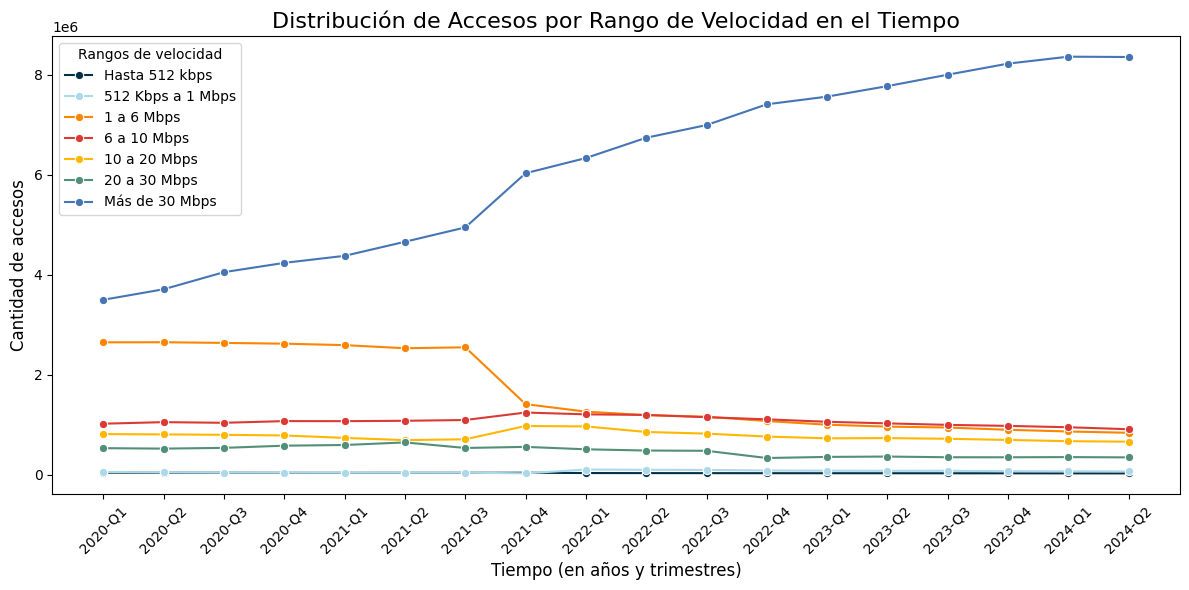

In [73]:
# Paleta de colores personalizada
custom_palette = {
    'Hasta 512 kbps': "#023047" , # azul bien oscuro
    '512 Kbps a 1 Mbps': "#abd9e9", # azul intermedio
    '1 a 6 Mbps': "#fb8500", # naranja
    '6 a 10 Mbps': "#db3a34", # mas rojo
    '10 a 20 Mbps':  "#ffb703", # amarillo"
    '20 a 30 Mbps': '#528f76', # verde dolar
    'Más de 30 Mbps': "#4575b4", # azul extremo
}


# selecciono los datos del total pais
selected_data = df_velrangoacc20a24[df_velrangoacc20a24['Provincia'] == 'Argentina - Total país']
selected_data = selected_data.loc[:, df_velrangoacc20a24.columns != 'Provincia']

# Combina 'Año' y 'Trimestre' en una unica columna 
selected_data['Time'] = selected_data['Año'].astype(str) + '-Q' + selected_data['Trimestre'].astype(str)

# Ordena la columna Time en forma ascendente 
selected_data['Time'] = pd.Categorical(
    selected_data['Time'],
    categories=sorted(selected_data['Time'].unique(), key=lambda x: (int(x.split('-')[0]), int(x.split('Q')[1]))),
    ordered=True
)

# Prepara el dataframe en formato largo para usar en seaborn
df_melted = selected_data.melt(
    id_vars=['Time'],
    value_vars=['Hasta 512 kbps', '512 Kbps a 1 Mbps', '1 a 6 Mbps', 
                '6 a 10 Mbps', '10 a 20 Mbps', '20 a 30 Mbps', 'Más de 30 Mbps'],
    var_name='Connection_Vel',
    value_name='Connections'
)

# Plotea usando Seaborn con la paleta de colores seleccionados
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_melted, 
    x='Time', 
    y='Connections', 
    hue='Connection_Vel', 
    marker='o', 
    palette=custom_palette  # paleta de colores seleccionados
)

# agrego titulo, leyendas de los ejes, roto las etiquetas del eje x, agrego leyenda por colores 
plt.title('Distribución de Accesos por Rango de Velocidad en el Tiempo', fontsize=16)
plt.xlabel('Tiempo (en años y trimestres)', fontsize=12)
plt.ylabel('Cantidad de accesos', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Rangos de velocidad')
plt.tight_layout()


plt.show()

En el gráfico se observa que la cantidad de accesos por los rangos de velocidad menores a 1 Mbps y de 6 a 30 mbps se mantuvieron constantes o disminuyeron levemente entre el primer trimestre de 2020 y el segundo trimestre de 2024, </br>
Los accesos de velocidad de 1 a 6 Mbps caen abruptamente entre el tercer y el cuarto trimestre de 2021 y luego continúan descendiendo, aunque más lentamente. </br>
Los accesos de velocidad de mas de 30 Mbps aumentan sostenidamente durante el periodo analizado y estimamos que seguirán así mientras aumenten los accesos por fibra óptica, aparezcan nuevas tecnologías de acceso y los requerimientos de acceso a internet continuen aumentando. </br>
Es deseable que la medición de accesos en el rango de velocidad que ahora se mide como 'más de 30 Mbps' pudiera discriminarse en rangos más precisos ya que entendemos que esta clasificación ha quedado obsoleta al aparecer tecnologías que permiten accesos de mayor velocidad.

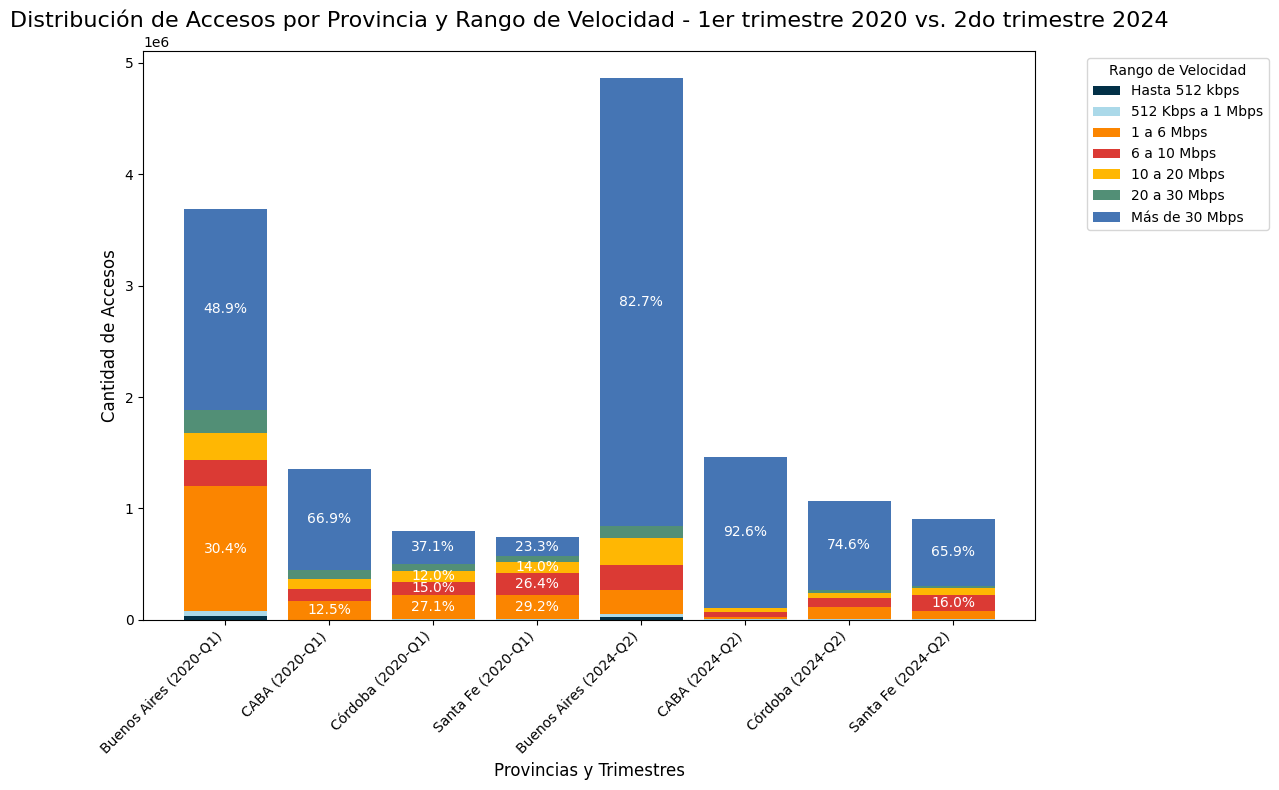

In [74]:
# paleta de colores personalizada (aunque la combinacin no me gusta respeto lsocolores que use en el grafico anterior)
custom_palette = {
    'Hasta 512 kbps': "#023047" , # azul bien oscuro
    '512 Kbps a 1 Mbps': "#abd9e9", # azul intermedio
    '1 a 6 Mbps': "#fb8500", # naranja
    '6 a 10 Mbps': "#db3a34", # mas rojo
    '10 a 20 Mbps':  "#ffb703", # amarillo"
    '20 a 30 Mbps': '#528f76', # verde dolar
    'Más de 30 Mbps': "#4575b4", # azul extremo
}

prov = ['Buenos Aires', 'CABA', 'Córdoba', 'Santa Fe']
selected_data  = df_velrangoacc20a24[
    (df_velrangoacc20a24['Provincia'].isin(prov)) & 
    ((df_velrangoacc20a24['Año'] == 2020) & (df_velrangoacc20a24['Trimestre'] == 1) | 
     (df_velrangoacc20a24['Año'] == 2024) & (df_velrangoacc20a24['Trimestre'] == 2))
]

# combino año , trmesrte y provincia en una etiqueta
selected_data['Label'] = selected_data['Provincia'] + ' (' + selected_data['Año'].astype(str) + '-Q' + selected_data['Trimestre'].astype(str) + ')'

# ordeno Año y Trimestre para asegurar el orden correcto
selected_data = selected_data.sort_values(by=['Año', 'Trimestre'])

# Step 2: Set 'Label' as the index and keep only the connection type columns
df_plot = selected_data.set_index('Label')[[
    'Hasta 512 kbps', '512 Kbps a 1 Mbps', '1 a 6 Mbps',
    '6 a 10 Mbps', '10 a 20 Mbps', '20 a 30 Mbps', 'Más de 30 Mbps'
]]

# Calcula el porcentaje para que aparezcan en las barras
df_percentages = df_plot.div(df_plot.sum(axis=1), axis=0) * 100  # Convert to percentages

# Grafico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
bars = []
bottoms = np.zeros(len(df_plot))  

for column in df_plot.columns:
    # dibuja cada segmento
    bar = ax.bar(
        df_plot.index,  # eiquetas del eje X
        df_plot[column],  # valores absolutos
        bottom=bottoms,  # comienza cada porcion en el segmento acumulado
        label=column,  # eqtiqueta para cada tipo de conexion
        color=custom_palette[column] 
    )
    bars.append(bar)
    bottoms += df_plot[column]  # actualiza el piso del acumulado (cumulative bottom) para la proxima porcion

# Escribe le porcentaje (solo si es >10%)
for i, (label, row) in enumerate(df_percentages.iterrows()):  # Itera en cada fila
    cumulative_bottom = 0  
    for j, value in enumerate(row):
        if value > 10:  
            ax.text(
                i,  # posicion en el eje X  (índice de la barra)
                cumulative_bottom + df_plot.iloc[i, j] / 2,  # Posición en el medio del segmento
                f'{value:.1f}%',  # etiqueta con el porcentaje
                ha='center', va='center', fontsize=10, color='white'
            )
        cumulative_bottom += df_plot.iloc[i, j]  
# Personaliza el grafico
ax.set_title('Distribución de Accesos por Provincia y Rango de Velocidad - 1er trimestre 2020 vs. 2do trimestre 2024', fontsize=16)
ax.set_xlabel('Provincias y Trimestres', fontsize=12)
ax.set_ylabel('Cantidad de Accesos', fontsize=12)
ax.set_xticks(range(len(df_plot.index)))
ax.set_xticklabels(df_plot.index, rotation=45, ha='right', fontsize=10)  
ax.legend(title='Rango de Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # coloca la leyenda de lso rangos de velocidad fuera del grafico
plt.tight_layout()


plt.show()

Comparamos la distribución de accesos por rangos de velocidad para las cuatro jurisdicciones con mayor cantidad de accesos entre el primer trimestre de 2020 y el segundo trimestre de 2024.</br>
Para el año 2020 en CABA, Córdoba y la provincia de Buenos Aires la mayor proporción de accesos por rango de velocidad ya correspondía a más de 30 Mbps. en cambio en Santa Fe el 55,6% correspondía a accesos con velocidades de 1 a 10 Mbps. </br>
En el segundo trimestre de 2024 las cuatro jurisdicciones tienen la mayor proporción de accesos con velocidad mayor a 30 Mbps.</br>
Santa Fe fue la jurisdicción donde más aumentó la proporción de accesos a internet de más de 30 Mbps, 42,6%. </br>
<h6> Nota: En este gráfico solo se muestran los porcentajes que son mayores a 10% <h6>

### Tema: Velocidad media de descarga

##### - Velocidad media de descarga por provincia

In [75]:
df_vmd = pd.read_excel('datos/internet.xlsx', sheet_name='Velocidad % por prov')

In [246]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_vmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


Las columnas tienen los tipos de datos adecuados para los valores que almacenan. No hay valores nulos

In [104]:
df_vmd.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


In [76]:
# selecciono los datos de los años 2020 a 2024

df_vmd20a24 = df_vmd[df_vmd['Año'].isin([2020, 2021, 2022, 2023, 2024])]

In [248]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_vmd20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     432 non-null    int64  
 1   Trimestre               432 non-null    int64  
 2   Provincia               432 non-null    object 
 3   Mbps (Media de bajada)  432 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.9+ KB


In [249]:
# Búsqueda de duplicados
# Podría haber duplicados. Por lo que faltaría más de un trimestre
df_vmd20a24[df_vmd20a24.duplicated(['Año', 'Trimestre', 'Provincia'])]

,Año,Trimestre,Provincia,Mbps (Media de bajada)


No hay combinacion de 'Año', 'Trimestre', 'Provincia' duplicados para esta solapa

Text(0.5, 0, 'Velocidad media de descarga (Mbps)')

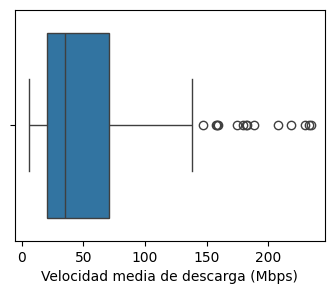

In [78]:
# Reviso si hay valores atipicos (outliers) en la columna de velocidad media de descarga
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_vmd20a24, x='Mbps (Media de bajada)')

plt.xlabel('Velocidad media de descarga (Mbps)', fontsize=10)


En este gráfico encontramos algunos valores que podrían ser outliers. Estimamos que corresponden a las jurisdicciones que tienen mayor proporción de accesos de mayor velocidad (Provincia de Buenos Aires, CABA, Córdoba y Santa Fe)

Text(0.5, 0, 'Velocidad media de descarga (Mbps)')

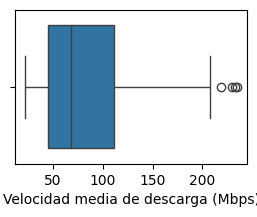

In [98]:
# Reviso si hay valores atipicos (outliers) seleccionando solo algunas provincias
plt.figure(figsize=(3, 2))

selected_data = df_vmd20a24[df_vmd20a24['Provincia'].isin(['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe'])]

sns.boxplot(data=selected_data, x='Mbps (Media de bajada)')

plt.xlabel('Velocidad media de descarga (Mbps)', fontsize=10)

In [80]:
# reviso a que provincia y trimestre pertenecen los valores de 'Mbps (Media de bajada)' mayores a 210 Mbps
df_vmd20a24[(df_vmd20a24['Mbps (Media de bajada)'] > 210)][['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)']]

,Año,Trimestre,Provincia,Mbps (Media de bajada)
1,2024,2,Capital Federal,233.01
25,2024,1,Capital Federal,229.94
49,2023,4,Capital Federal,234.44
73,2023,3,Capital Federal,218.13


Estos valores corresponden a CABA. Consideramos que no son valores atípicos para esa jurisdicción

</br>

##### - Velocidad media de descarga total país

In [81]:
df_vmdtot = pd.read_excel('datos/internet.xlsx', sheet_name='Totales VMD')

In [82]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_vmdtot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   Trimestre.1             42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [83]:
df_vmdtot.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


In [84]:
# selecciono los datos de los años 2020 a 2024
df_vmdtot20a24 = df_vmdtot[df_vmdtot['Año'].isin([2020, 2021, 2022, 2023, 2024])]

In [85]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_vmdtot20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     18 non-null     int64  
 1   Trimestre               18 non-null     int64  
 2   Mbps (Media de bajada)  18 non-null     float64
 3   Trimestre.1             18 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 720.0+ bytes


No hay valores nulos. Si no hay valores duplicados, como el total de filas es 18, estarían los totales para todos los años y trimestres que analizaré. </br>
Eliminaré la última columna que indica el año y los meses comprendidos en el período correspondiente a cada fila.

In [86]:
# Búsqueda de duplicados
df_vmdtot20a24[df_vmdtot20a24.duplicated(['Año', 'Trimestre'])]

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1


No hay filas duplicadas por combinación de 'Año', 'Trimestre'

Text(0.5, 0, 'Velocidad media de descarga (Mbps)')

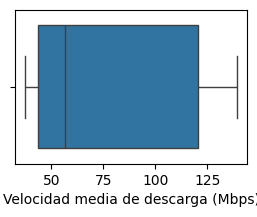

In [97]:
# Reviso si hay valores atipicos (outliers) en la columna Media de bajada

plt.figure(figsize=(3, 2))

sns.boxplot(data=df_vmdtot20a24, x='Mbps (Media de bajada)')

plt.xlabel('Velocidad media de descarga (Mbps)', fontsize=10)

No hay outliers para la columna analizada

In [88]:
# Agrego la columna Provincia al dataframe de los totales y el valor correspondiente

df_vmdtot20a24['Provincia'] = 'Argentina - Total país'

In [89]:
# agrego las filas de las provincias al dataframe de los total pais
df_merge = pd.concat([df_vmdtot20a24, df_vmd20a24])

In [90]:
# Ahora que uni las filas renombro la columna Mbps (Media de bajada) por Vel Media Descarga (Mbps). Ese nombre me parece mas preciso
df_merge.rename(columns={'Mbps (Media de bajada)': 'Vel media descarga (Mbps)'}, inplace=True)

In [91]:
# reordeno las columnas y renombro el dataframe
# df = df[['mean', 4,3,2,1]]

df_velmd20a24 = df_merge[['Año', 'Trimestre', 'Provincia', 'Vel media descarga (Mbps)']]

In [92]:
df_velmd20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 431
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        450 non-null    int64  
 1   Trimestre                  450 non-null    int64  
 2   Provincia                  450 non-null    object 
 3   Vel media descarga (Mbps)  450 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 17.6+ KB


In [93]:
# Modifico valor capital federal a CABA
# df.loc[df['column_name'] == 'some_value', 'column_name'] = 'new_value'
df_velmd20a24.loc[df_velmd20a24['Provincia'] == 'Capital Federal', 'Provincia'] = 'CABA'

In [397]:
# grabo el archivo para usar los datos en el tablero
df_velmd20a24.to_excel("datos/velmd20a24.xlsx", index=False)  

</br>

- Análisis de los datos de velocidad media de descarga totales y por jurisdicción

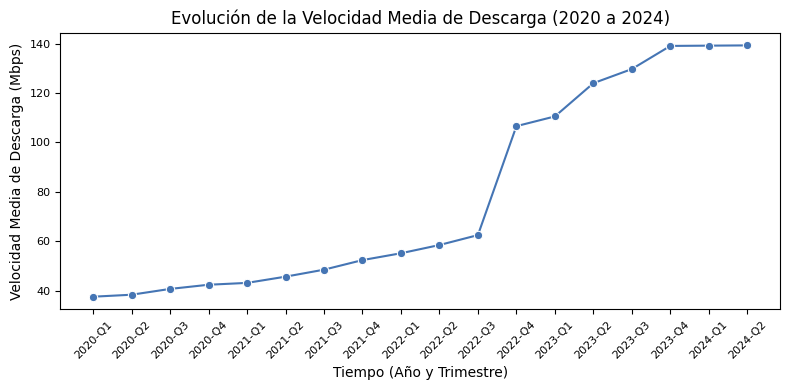

In [298]:
selected_data = df_velmd20a24[df_velmd20a24['Provincia'] == 'Argentina - Total país']

# Combina 'Año' y 'Trimestre' en una sola columna
selected_data['Time'] = selected_data['Año'].astype(str) + '-Q' + selected_data['Trimestre'].astype(str)

# ordena la columna Time de Q1 2020 a Q2 2024
selected_data['Time'] = pd.Categorical(
    selected_data['Time'],
    categories=sorted(selected_data['Time'].unique(), key=lambda x: (int(x.split('-')[0]), int(x.split('Q')[1]))),
    ordered=True
)

# dibuja el grafico de lineas
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=selected_data,
    x='Time',
    y='Vel media descarga (Mbps)',
    marker='o',
    color='#4575b4'
)
# Personaliza el grafico. leyendas
plt.title('Evolución de la Velocidad Media de Descarga (2020 a 2024)', fontsize=12)
plt.xlabel('Tiempo (Año y Trimestre)', fontsize=10)
plt.ylabel('Velocidad Media de Descarga (Mbps)', fontsize=10)

plt.xticks(rotation=45, fontsize=8)    # rota las leyendas del eje x para facilitar la lectura
plt.yticks(fontsize=8) 
plt.tight_layout()

# Show the plot
plt.show()

Se observa que la velocidad media de descarga medida para todo el país aumentó de 37 Mbps en el primer trimestre de 2020 a 62 Mbps en el tercer trimestre de 2022. Luego tuvo un aumento aún más pronunciado, llegando a 139 Mbps en el cuarto trimestre de 2023. No se observan aumentos significativos de la velocidad media de descarga a partir de ese momento.

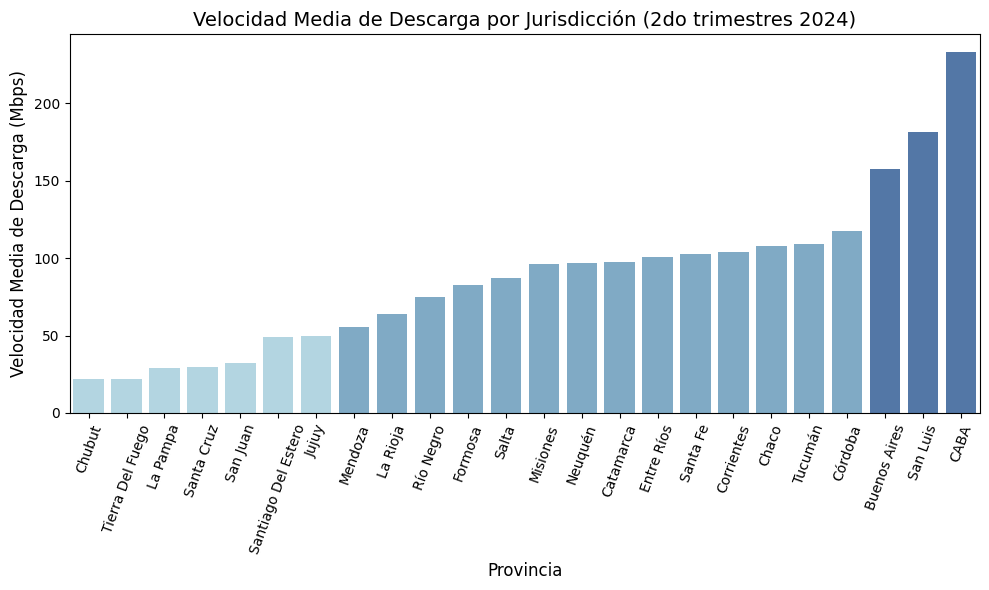

In [95]:
selected_data = df_velmd20a24[(df_velmd20a24['Año'] == 2024) & (df_velmd20a24['Trimestre'] == 2) & (df_velmd20a24['Provincia'] != 'Argentina - Total país')]

# asigno colores de las barras de acuerdo al rango de velocidad
def assign_color(value):
    if value < 50:  # Rango 1 (< 50)
        return '#abd9e9' 
    elif 50 <= value <= 150:  # Rango 2 (50 to 150)
        return '#74add1' 
    else:  # Rango 3 (> 150)
        return '#4575b4' 

# "#abd9e9","#74add1", "#4575b4"

# aplica la Funcion que asigna el color
selected_data['Color'] = selected_data['Vel media descarga (Mbps)'].apply(assign_color)


# Crea un diccionario para mapear cada provincia con su color
palette_dict = dict(zip(selected_data['Provincia'], selected_data['Color']))

# Grafico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Provincia',  # Provincia en el eje x
    y='Vel media descarga (Mbps)',  # Valores en el eje y
    data=selected_data,
    order=selected_data.sort_values('Vel media descarga (Mbps)')['Provincia'],  # ordena los valores 
    palette=palette_dict  # paleta personalizada
)

# personaliza el grafico
plt.title('Velocidad Media de Descarga por Jurisdicción (2do trimestres 2024)', fontsize=14)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Velocidad Media de Descarga (Mbps)', fontsize=12)
plt.xticks(rotation=70, fontsize=10)  
plt.tight_layout()


plt.show()

Si clasificamos las jurisdicciones en tres grupos de acuerdo a la velocidad media de descarga para el último trimestre de 2024 observamos que 7 de ellas tienen velocidad media de descarga inferior a 50 Mbps. La mayoría tiene velocidad media de descarga entre 50 y 150 Mbps. Y solo tres jurisdicciones tienen velocidad media de descarga mayores a 150 Mbps. Estas son CABA, San Luis y la provincia de Buenos Aires.</br>
Nos llama la atención que Santa Fe y Córdoba, teniendo mayor proporción de sus accesos con velocidades mayores a 30 Mbps, no se encuentran entre las jurisdicciones con mayor velocidad media de descarga.

</br>

### Acceso a internet fija - Ingresos por año y trimestre para todo el país

In [320]:
# Desactivo en pandas la notación científica para números grandes
pd.options.display.float_format = '{:.0f}'.format


In [321]:
df_ing = pd.read_excel('datos/internet.xlsx', sheet_name='Ingresos')

In [322]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df_ing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Las columnas tienen los tipos de datos adecuados para los valores almacenados. No hay valores nulos

In [323]:
df_ing.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,442032167,Abr-Jun 2024
1,2024,1,346198986,Ene-Mar 2024
2,2023,4,167376015,Oct-Dic 2023
3,2023,3,133106593,Jul-Sept 2023
4,2023,2,118060280,Jun-Mar 2023


In [324]:
# selecciono los datos de los años 2020 a 2024

df_ing20a24 = df_ing[df_ing['Año'].isin([2020, 2021, 2022, 2023, 2024])]

In [325]:
df_ing20a24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 17
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        17 non-null     int64  
 1   Trimestre                  17 non-null     int64  
 2   Ingresos (miles de pesos)  17 non-null     float64
 3   Periodo                    17 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 680.0+ bytes


Tiene 17 filas por lo que deben faltar los datos de un trimestre

In [326]:
df_ing20a24 

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,442032167,Abr-Jun 2024
1,2024,1,346198986,Ene-Mar 2024
2,2023,4,167376015,Oct-Dic 2023
3,2023,3,133106593,Jul-Sept 2023
4,2023,2,118060280,Jun-Mar 2023
6,2022,4,72443483,Oct-Dic 2022
7,2022,3,64086784,Jul-Sept 2022
8,2022,2,60419501,Abr-Jun 2022
9,2022,1,55219313,Ene-Mar 2022
10,2021,4,45467887,Oct-Dic 2021


Faltan los datos del primer trimestre del año 2023. </br>
Encontré esos datos en https://indicadores.enacom.gob.ar/datos-abiertos-internet-ingresos. Agrego esa fila

In [327]:
# agrego los datos de Ingresos Trimestre 1 año 2023

new_row = pd.DataFrame([[2023, 1, 104134993, 'Ene-Mar 2023' ]], columns=['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'])

df_ing20a24 = pd.concat([df_ing20a24, new_row], ignore_index=True)


In [328]:
# reviso si hay duplicados por si hubiera observado mal
# Búsqueda de duplicados
# Podría haber duplicados. Por lo que faltaría más de un trimestre
df_ing20a24[df_ing20a24.duplicated(['Año', 'Trimestre'])]

,Año,Trimestre,Ingresos (miles de pesos),Periodo


No hay combinacion de 'Año', 'Trimestre' duplicados para esta solapa

In [329]:
# convierto a los pesos que corresponde (no en miles de pesos).
# y luego convierto a dolares para hacer comparaciones en una moneda constante 
df_ing20a24['Ingresos (pesos)'] = df_ing20a24['Ingresos (miles de pesos)'] * 1000

In [330]:
df_ing20a24.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos (pesos)
0,2024,2,442032167,Abr-Jun 2024,442032166690
1,2024,1,346198986,Ene-Mar 2024,346198986130
2,2023,4,167376015,Oct-Dic 2023,167376014800
3,2023,3,133106593,Jul-Sept 2023,133106593410
4,2023,2,118060280,Jun-Mar 2023,118060280280


Calcularé los ingresos en dólares estadounideses para poder hacer comparaciones en una moneda constante a lo largo del periodo.</br>
Utilizaré el Tipo de Cambio Minorista vendedor publicado por el Banco Central en su pagina web https://www.bcra.gob.ar/PublicacionesEstadisticas/Tipo_de_cambio_minorista.asp

In [347]:
# leo el archivo del tipo de cambio diario 
df_cotizdolar = pd.read_excel('datos/cotizdolarBCRA2020a2025.xlsx')

In [348]:
df_cotizdolar.head()

,Fecha,Comprador,Vendedor
0,2025-01-15,1013,1069
1,2025-01-14,1010,1068
2,2025-01-13,1010,1067
3,2025-01-10,1009,1066
4,2025-01-09,1008,1066


In [333]:
df_cotizdolar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      1221 non-null   datetime64[ns]
 1   Comprador  1221 non-null   float64       
 2   Vendedor   1221 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 28.7 KB


Selecciono las fechas de la mitad del trimestre para leer la cotización del dólar y armo un dataframe. Si ese dia no hubo operaciones agrego el siguiente dia hábil.

In [334]:
# selecciono las fechas de la mitad del trimestre para leer la cotizacion del dolar y armo un dataframe
df_cotdoltrim = pd.DataFrame({'Año': [2020,2020,2020,2020,2021,2021,2021,2021, 2022,2022,2022,2022, 2023,2023,2023,2023,2024,2024],
                             'Trimestre': [ 1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2],
'Fecha': [ '2020-02-14','2020-05-15', '2020-08-14','2020-11-16','2021-02-17','2021-05-14','2021-08-17','2021-11-15','2022-02-17','2022-05-16','2022-08-16','2022-11-15',
          '2023-02-15','2023-05-15','2023-08-15','2023-11-15','2024-02-15','2024-05-15']})

In [349]:
# reviso que esten todos los valores necesarios
df_cotdoltrim

,Año,Trimestre,Fecha,Comprador,Vendedor
0,2020,1,2020-02-14,59,64
1,2020,2,2020-05-15,65,70
2,2020,3,2020-08-14,72,77
3,2020,4,2020-11-16,79,86
4,2021,1,2021-02-17,88,94
5,2021,2,2021-05-14,93,100
6,2021,3,2021-08-17,96,103
7,2021,4,2021-11-15,99,106
8,2022,1,2022-02-17,106,112
9,2022,2,2022-05-16,117,123


In [337]:
df_cotdoltrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        18 non-null     int64 
 1   Trimestre  18 non-null     int64 
 2   Fecha      18 non-null     object
dtypes: int64(2), object(1)
memory usage: 564.0+ bytes


In [338]:
# convierto la columna fecha a datetime para hacer join con el dataframe de cotizacion de dolar
#df['A'] = pd.to_datetime(df['A'])
df_cotdoltrim['Fecha'] = pd.to_datetime(df_cotdoltrim['Fecha'])

In [339]:
# hago inner join para obtener las cotizaciones de las fechas que me interesan
df_cotdoltrim = pd.merge(df_cotdoltrim, df_cotizdolar, how='left', on=['Fecha'])

In [350]:
# Reviso que el dataframe de donde tomare la cotizacion del dolar tenga una fecha por cada uno de lso trimestres que analizare
df_cotdoltrim

,Año,Trimestre,Fecha,Comprador,Vendedor
0,2020,1,2020-02-14,59,64
1,2020,2,2020-05-15,65,70
2,2020,3,2020-08-14,72,77
3,2020,4,2020-11-16,79,86
4,2021,1,2021-02-17,88,94
5,2021,2,2021-05-14,93,100
6,2021,3,2021-08-17,96,103
7,2021,4,2021-11-15,99,106
8,2022,1,2022-02-17,106,112
9,2022,2,2022-05-16,117,123


In [352]:
# hago inner join entre el dataframe de las fechas cotizacion dolar y el de ingresos 
# agrego una columna con el ingreso calculado en dolares y reviso como quedó
df_merge = pd.merge(df_ing20a24, df_cotdoltrim, how='left', on=['Año', 'Trimestre'])
df_merge['Ingresos (dolares)'] = df_merge['Ingresos (pesos)'] / df_merge['Vendedor']
df_merge.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos (pesos),Fecha,Comprador,Vendedor,Ingresos (dolares)
0,2024,2,442032167,Abr-Jun 2024,442032166690,2024-05-15,869,929,475978988
1,2024,1,346198986,Ene-Mar 2024,346198986130,2024-02-15,822,881,393154176
2,2023,4,167376015,Oct-Dic 2023,167376014800,2023-11-15,351,371,451746151
3,2023,3,133106593,Jul-Sept 2023,133106593410,2023-08-15,347,367,363057258
4,2023,2,118060280,Jun-Mar 2023,118060280280,2023-05-15,230,241,489093321


In [354]:
# Agrego una columna de Provincia para que pueda relacionarse con las otras tablas en el tablero
df_merge['Provincia'] = 'Argentina - Total país'

In [355]:
# selecciono las columnas que me interesan y las reordeno para armar el dataframe de ingresos definitivo
df_ingdol20a24 = df_merge[['Año', 'Trimestre', 'Provincia', 'Ingresos (pesos)', 'Ingresos (dolares)']]

In [356]:
# grabo el archivo para usar los datos en el tablero
df_ingdol20a24.to_excel("datos/ingdol20a24new2.xlsx", index=False)  

In [396]:
df_cotdoltrim.to_excel("datos/df_cotdoltrim.xlsx", index=False)  

</br>

- Análisis de los datos de ingresos para todo el país

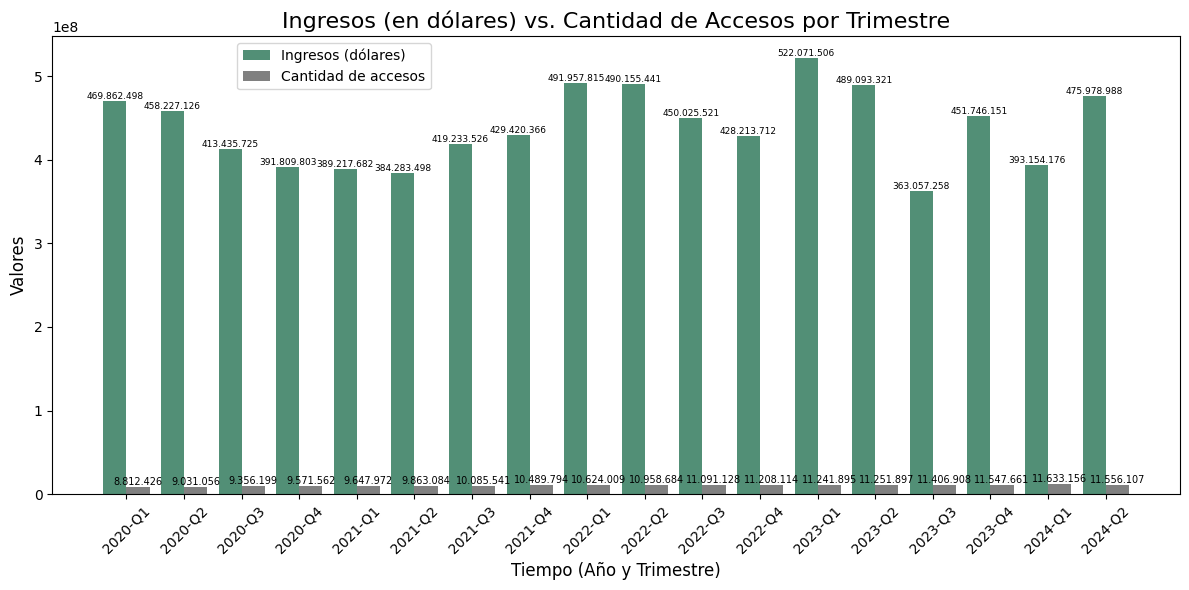

In [392]:
# Uno los dataframes por Año, Trimestre, and Provincia
selected_data = df_tecnoacc20a24[df_tecnoacc20a24['Provincia'] == 'Argentina - Total país']
df_merged1 = pd.merge(
    df_ingdol20a24[['Año', 'Trimestre', 'Ingresos (dolares)']],
    selected_data[['Año', 'Trimestre',  'Total']],
    on=['Año', 'Trimestre']
)

# Combino Año y Trimestre en una columna Time que se usara en el eje X
df_merged1['Time'] = df_merged1['Año'].astype(str) + '-Q' + df_merged1['Trimestre'].astype(str)

# Ordena la columna Time cronologicamente
df_merged1['Time'] = pd.Categorical(
    df_merged1['Time'],
    categories=sorted(df_merged1['Time'].unique(), key=lambda x: (int(x.split('-')[0]), int(x.split('Q')[1]))),
    ordered=True
)

df_merged = df_merged1.sort_values(by=['Año', 'Trimestre']).reset_index(drop=True)

# setea la posicion y el ancho de las barras
x = np.arange(len(df_merged['Time']))  
width = 0.4  

# Crea el grafico
fig, ax = plt.subplots(figsize=(12, 6))

# dibuja las barras de ingresos
bars_income = ax.bar(
    x - width / 2,  # Position the income bars slightly to the left
    df_merged['Ingresos (dolares)'],  # Height of income bars
    width,  # Width of income bars
    color='#528f76',  # Income bar color
    label='Ingresos (dólares)'
)

# dibujas las barras de accesos
bars_access = ax.bar(
    x + width / 2,  
    df_merged['Total'], 
    width,  
    color='gray',  
    label='Cantidad de accesos'
)
# agrega los valores sobre de las barras de ingresos (on top)
for bar in bars_income:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, yval + 100, 
        f'{yval:,.0f}'.replace(',', '.'),  # reemplaza comas por puntos 
        ha='center', va='bottom', fontsize=6.5, color='black'
    )

# agrega los valores sobre de las barras de accesos
for bar in bars_access:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, yval + 5000,
       f'{yval:,.0f}'.replace(',', '.'),  # reemplaze comas por puntos 
        ha='center', va='bottom', fontsize=7, color='black'
    )

# personalizacion del grafico
ax.set_title('Ingresos (en dólares) vs. Cantidad de Accesos por Trimestre', fontsize=16)
ax.set_xlabel('Tiempo (Año y Trimestre)', fontsize=12)
ax.set_ylabel('Valores', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df_merged['Time'], rotation=45, fontsize=10)  

# ajusto la leyenda para que no tape al grafico 
# ax.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.35, 1.05), ncol=1)  # Custom legend position
ax.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.25, 1.0), ncol=1)

# Disposición ajustada para evitar superposiciones
plt.tight_layout()

plt.show()

Si observamos la evolución de los ingresos (medidos en dólares) generados por los servicios de internet no se puede determinar una tendencia clara a lo largo del periodo estudiado. Pero si calculamos el ingreso promedio por acceso en ambos periodos notamos que hubo una disminución del 22,7%. Sin distinguir diferencias de tecnología, velocidades ni área geográficas, en el primer trimestre de 2020 el ingreso promedio por acceso era de u$s 53,32 y en el segundo trimestre de 2024 era de u$s 41,19.

</br>

</br>

### Conclusiones y recomendaciones

Luego de realizar el análisis solicitado merecen destacarse los siguientes hallazgos:</br>
- En el periodo analizado todas las jurisdicciones aumentaron la tasa de penetración cada 100 hogares superando los 40 accesos cada 100 hogares. Formosa es la provincia con menor tasa de penetración. Mientras que La Pampa, Tierra del Fuego, San Luis y CABA son las jurisdicciones con mayores tasas de penetración superando 100 accesos cada 100 hogares. </br>
- Como se esperaba, en el mismo periodo se observó un aumento de la cantidad de accesos, independientemente de la tecnología. Al comienzo de 2020 el total de accesos era 8.812.426 y había 11.556.107 en el segundo trimestre de 2024. Santa Fe, Córdoba, CABA y Provincia de Buenos Aires tenían más de 500.000 accesos por jurisdicción. </br>
- Las tecnologías para acceder a internet fija más utilizadas fueron ADSL, cablemodem, fibra óptica y wireless. Los accesos por cablemodem tuvieron un aumento del 20% y continúan siendo la tecnología más elegida. Mientras que los accesos por fibra óptica han aumentado casi 400% entre comienzo de 2020 y el segundo trimestre de 2024. </br>
- La cantidad de accesos por los rangos de velocidad menores a 1 Mbps y de 6 a 30 mbps se mantuvieron constantes o disminuyeron levemente durante el periodo estudiado. Por el contrario, los accesos de velocidad de más de 30 Mbps aumentaron sostenidamente durante el periodo analizado. Santa Fe, Córdoba, CABA y Provincia de Buenos Aires tenían en 2024 la mayor proporción de accesos con velocidad mayor a 30 Mbps. Sería deseable poder acceder a datos de velocidad mayor a 30 Mbps discriminada por rangos.</br>
- La velocidad media de descarga medida para todo el país aumentó de 37 Mbps en el primer trimestre de 2020 a 139 Mbps en el cuarto trimestre de 2023. No se observaron aumentos significativos partir de ese momento.
- Por último, la evolución de los ingresos (medidos en dólares) generados por los servicios de internet no muestran una tendencia clara a lo largo del periodo estudiado. Pero si calculamos el ingreso promedio por acceso en ambos periodos notamos que hubo una disminución del 22,7%. Sin distinguir diferencias de tecnología, velocidades ni áreas geográficas, en el primer trimestre de 2020 el ingreso promedio por acceso era de u$s 53,32 y en el segundo trimestre de 2024 era de u$s 41,19.
</br></br>
Observamos que en Argentina existe un grupo de provincias conformado por Ciudad Autónoma de Buenos Aires, Provincia de Buenos Aires, Córdoba y Santa Fe con mayor cantidad de acceso a internet fija por jurisdicción y una mayor proporción de sus accesos con velocidades mayores a 30 Mbps. Y el resto de las jurisdicciones con características disímiles.</br></br>
Si por los resultados de este análisis la empresa decidiera invertir en Argentina, se sugiere evaluar dos cursos de acción posibles:</br>
- comenzar las operaciones gradualmente por distintas localidades y departamentos de las cuatro jurisdicciones mencionadas, ya que sus habitantes son clientes activos de otras compañías de telecomunicaciones y podrían optar por esta empresa si se ofrecen servicios de tecnología moderna, velocidad y tarifas adecuadas. 
- comenzar por otras provincias de Argentina con menor cantidad de accesos a internet por jurisdicción y tecnología más anticuada. De elegir esta opción se requeriría invertir más capital y retrasar el recupero pero las oportunidades de serían más numerosas por no existir tantos competidores.
En todos los casos sugerimos recordar que Argentina es un país de gran extensión geográfica, para prevenir las dificultades que podrían aparecer durante la instalación de la infraestructura requerida.

De optar por cualquiera de estas opciones consideramos que sería conveniente realizar previamente un análisis más detallado, con datos de acceso a internet fija a nivel de departamento y localidad de las provincias seleccionadas. También sería deseable estudiar el comportamiento asociado a otros servicios de comunicación, como telefonía fija, movil y televisión con el fin de identificar otras oportunidades de crecimiento.</br></br>